# **Individual Household Electric Power Consumption**<br>
Adonay Rodrigues da Rocha - RM558782 <br>
Thamires Ribeiro - RM558128 <br>
Pedro Henrique Martins dos Reis - RM555306 <br>

In [ ]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

DataSet disponível em: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption <br>
1. Entre no link
2. Clique em Download
3. Extraia o arquivo zipado
4. Copie o arquivo
5. Cole o arquivo no ficheiro

In [ ]:
# Importa o DataFrame
df = pd.read_csv("household_power_consumption.txt", sep=";", engine='python')

# Salva o DataFrame como CSV
df.to_csv("household_power_consumption.csv", index=False)

**Global_active_power VS Global_reactive_power**

São tipos diferentes de potência elétrica

*   **Global_active_power (Potência Ativa)**
    *   Medida em kW.
    *   Representa a energia realmente consumida para fazer trabalho útil, como ligar luzes, aquecer água, ligar eletrodomésticos.

*   **Global_reactive_power (Potência Reativa)**
    *   Medida em kW também.
    *   Representa a energia que circula no circuito, mas não realiza trabalho útil.
    *   Geralmente associada a equipamentos com motores ou capacitores (como geladeira, ar-condicionado).

**Simplificando**

*   Ativa = Energia útil consumida.
*   Reativa = Energia que “oscila” no sistema.

**As 10 Primeiras linhas do DataSet**

São úteis para identificar o padrão dos dados, e compreender os significados de cada coluna.
ada linha representa uma medição feita em um determinado instante, e cada coluna contém um tipo específico de informação relacionada ao consumo ou às características da rede elétrica naquele momento.

Explicação das colunas:

**Date**: representa a data em que a medição foi realizada, no formato dd/mm/yyyy.
Exemplo: 16/12/2006 indica que a medição foi feita no dia 16 de dezembro de 2006.

**Time**: mostra o horário exato da medição, no formato HH:MM:SS.
Exemplo: 17:24:00 indica que os dados foram coletados às 17 horas, 24 minutos e 0 segundos.

**Global_active_power**: é a potência ativa global, medida em quilowatts (kW). Representa a quantidade total de energia consumida naquele minuto.
Valores mais altos indicam maior consumo de energia.

**Global_reactive_power**: é a potência reativa global, também medida em quilowatts (kW). Essa energia não é convertida em trabalho útil, mas circula entre a fonte e a carga (como acontece em motores e transformadores).

**Voltage**: indica a tensão elétrica instantânea da rede no momento da medição, medida em volts (V).
Valores típicos giram em torno de 230V, mas pequenas variações são normais.

**Global_intensity**: representa a corrente elétrica total, medida em amperes (A). Está relacionada ao fluxo de elétrons que circula no sistema.
Ela é diretamente proporcional à potência ativa.

**Sub_metering_1**: mede o consumo de energia, em watt-hora (Wh), de um circuito específico da casa — normalmente a cozinha, incluindo o forno, micro-ondas, etc.

**Sub_metering_2**: mede o consumo de um segundo circuito — geralmente relacionado à lavanderia, como máquina de lavar, secadora ou outros eletrodomésticos.

**Sub_metering_3**: corresponde ao consumo de um terceiro circuito, frequentemente associado à aquecimento de água, como aquecedores elétricos ou boilers.

In [ ]:
# As 10 Primeiras linhas do DataSet
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


**Linhas com valores ausentes** <br>
Esses numeros representam o numero total de linhas com valores vazios e a porcentagem da qual elas representam do todo.

In [ ]:
rows_w_missing = df[df.isnull().any(axis=1)]
print(f"Número total de linhas do dataset: {df.shape[0]}")
print(f"Número total de linhas com valores vazios: {len(rows_w_missing)}")

Número total de linhas do dataset: 2075259
Número total de linhas com valores vazios: 25979


In [ ]:
perc = (len(rows_w_missing) / df.shape[0]) * 100
print(f"Porcentagem de linhas com valores vazios: {perc:.2f}%")

Porcentagem de linhas com valores vazios: 1.25%


In [ ]:
# Tratamento das linha com valores vazios
# Excluir todas as linhas com valores vazios
df.dropna(inplace=True)

# Verificar se ainda existem linhas com valores vazios
print("Número de linhas com valores vazios após a exclusão:", df.isnull().sum().sum())

Número de linhas com valores vazios após a exclusão: 0


**Conversão da coluna date, para datetime**

In [ ]:
# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Dia da semana
df['Day_of_Week'] = df['Date'].dt.day_name()

# DateTime unindo Date + Time
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')

print(df[['Date', 'Time', 'DateTime', 'Day_of_Week']].head())

        Date      Time            DateTime Day_of_Week
0 2006-12-16  17:24:00 2006-12-16 17:24:00    Saturday
1 2006-12-16  17:25:00 2006-12-16 17:25:00    Saturday
2 2006-12-16  17:26:00 2006-12-16 17:26:00    Saturday
3 2006-12-16  17:27:00 2006-12-16 17:27:00    Saturday
4 2006-12-16  17:28:00 2006-12-16 17:28:00    Saturday


**Filtrar registros apenas do ano de 2007 e calcular a média diária de Global_active_power**

In [ ]:
# Conversão das colunas novamnete, pois, estava apresentando erro
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')

# Converter Global_active_power para numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtrar apenas 2007
df_2007 = df[df['DateTime'].dt.year == 2007]

# Calcular a média diária
media_diaria_2007 = df_2007.groupby(df_2007['DateTime'].dt.date)['Global_active_power'].mean()

print("Média diária de Global_active_power em 2007:")
print(media_diaria_2007.head())

Média diária de Global_active_power em 2007:
DateTime
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


**Variação do dia 2007-01-15 (Segunda-feira)**

Interessante que o horario de pico de consumo, ocorre por volta das 07h e das 19h. Horário este em que as pessoas estão saindo para trabalhar e retornando de seus trabalhos.

Além disso, na madrugada o consumo de energia é mais "previsivel" se mantendo estavel por alguams horas.

Há um pico estranho, antes da meia-noite, talvez, o lanche da noite, filmes, banhos antes de dormir.

Existe dois períodos de estabilidade, sendo das 02h as 06h, 10h as 12h

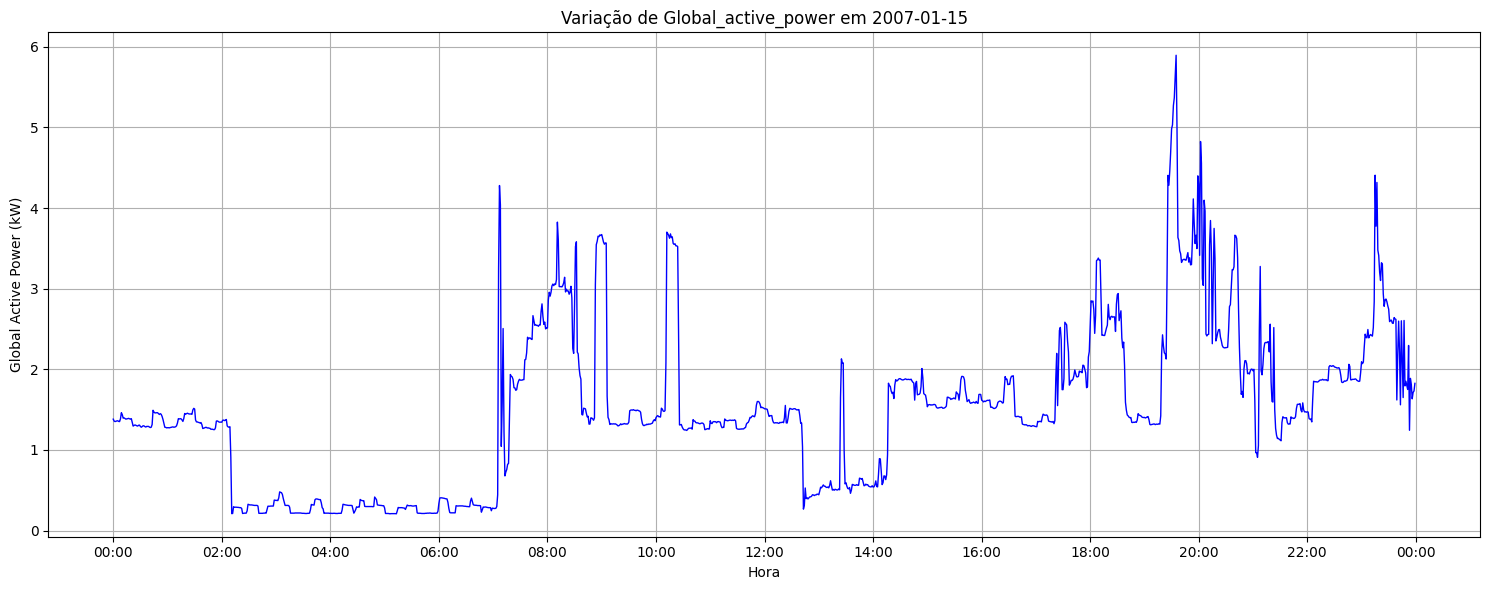

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')

# Filtrando ano 2007
df_2007 = df[df['DateTime'].dt.year == 2007]

# Dia específico
dia_escolhido = "2007-01-15"
df_dia = df_2007[df_2007['DateTime'].dt.date.astype(str) == dia_escolhido]

plt.figure(figsize=(15, 6))
plt.plot(df_dia['DateTime'], df_dia['Global_active_power'], color='blue', linewidth=1)
plt.title(f"Variação de Global_active_power em {dia_escolhido}")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)

# Ticks de 2 em 2 horas
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()

**Variação do dia 2007-01-13 (Sábado)**

Para constestar os tópicos falados anteriormente sobre os horários de pico, realizei a analise do sabado.

No sábado, o padrão de consumo de energia apresenta diferenças claras em relação à segunda-feira. Durante a madrugada, entre 01h e 06h, observa-se um longo período de estabilidade, com consumo relativamente baixo e constante.

A partir das 07h, surgem dois picos distintos, indicando aumento na atividade doméstica, talvez cafés da manhã, preparativos para passeios ou tarefas de lazer. Após esses picos, o consumo se mantém elevado por boa parte do dia, sugerindo que as pessoas permanecem em casa e utilizam mais aparelhos elétricos.

Há, no entanto, uma estranheza no gráfico: o período entre 20h e 00h apresenta alta variabilidade, possivelmente devido à falta de dados, o que impede uma análise completa do comportamento de consumo nesse intervalo noturno.

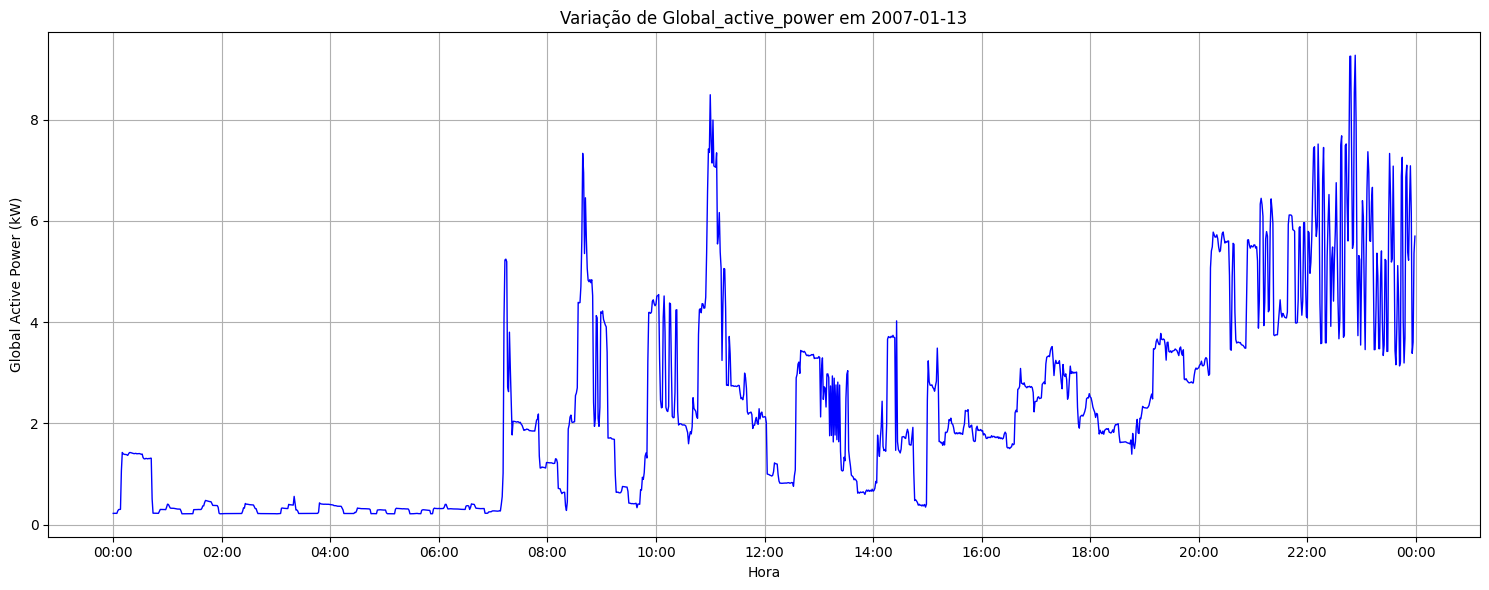

In [ ]:
# Convertendo datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')

# Filtrando ano 2007
df_2007 = df[df['DateTime'].dt.year == 2007]

# Dia específico: 14 de janeiro de 2007
dia_escolhido = "2007-01-13"
df_dia = df_2007[df_2007['DateTime'].dt.date.astype(str) == dia_escolhido]

plt.figure(figsize=(15, 6))
plt.plot(df_dia['DateTime'], df_dia['Global_active_power'], color='blue', linewidth=1)
plt.title(f"Variação de Global_active_power em {dia_escolhido}")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)

# Ticks de 2 em 2 horas
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()


## Exercício 7 — Histograma de Voltage e análise da distribuição

**Enunciado**  
Gerar o histograma da variável `Voltage` do dataset de consumo de energia, calcular estatísticas descritivas (média, mediana, desvio-padrão, quartis, mínimo e máximo), verificar assimetria e curtose, e interpretar a distribuição.

---

**Objetivo**  
- Visualizar a distribuição da variável `Voltage` no dataset.  
- Comparar média e mediana para verificar possíveis assimetrias.  
- Observar dispersão (desvio-padrão) e forma da distribuição (curtose).  
- Identificar padrões da tensão elétrica registrada.


Voltage - Dataset completo
Contagem: 2049280
Média: 240.840 V | Mediana: 241.010 V | Desvio-padrão: 3.240 V
Mín: 223.200 V | Q1: 238.990 V | Q3: 242.890 V | Máx: 254.150 V
Assimetria: -0.327 | Curtose: 0.725


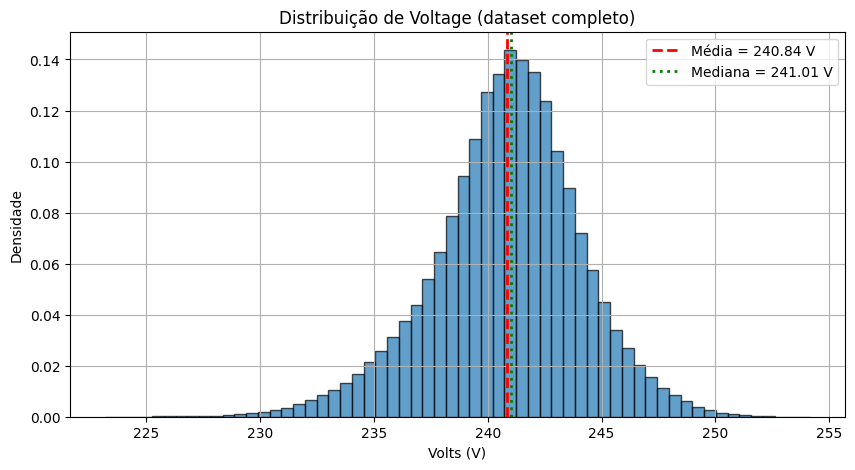

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Carregar o dataset (ajuste o caminho se precisar)
df = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    na_values="?",
    low_memory=False
)

# 2) Converter para datetime
df["DateTime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)

# 3) Converter Voltage em numérico
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")

# 4) Agora o exercício 7: histograma de Voltage
s_all = df["Voltage"].dropna()

mean_all = s_all.mean()
median_all = s_all.median()
std_all = s_all.std()
skew_all = s_all.skew()
kurt_all = s_all.kurt()

print("Voltage - Dataset completo")
print(f"Contagem: {s_all.shape[0]}")
print(f"Média: {mean_all:.3f} V | Mediana: {median_all:.3f} V | Desvio-padrão: {std_all:.3f} V")
print(f"Mín: {s_all.min():.3f} V | Q1: {s_all.quantile(0.25):.3f} V | Q3: {s_all.quantile(0.75):.3f} V | Máx: {s_all.max():.3f} V")
print(f"Assimetria: {skew_all:.3f} | Curtose: {kurt_all:.3f}")

plt.figure(figsize=(10,5))
plt.hist(s_all, bins=60, density=True, edgecolor="black", alpha=0.7)
plt.axvline(mean_all, linestyle="--", linewidth=2, color="red", label=f"Média = {mean_all:.2f} V")
plt.axvline(median_all, linestyle=":", linewidth=2, color="green", label=f"Mediana = {median_all:.2f} V")
plt.title("Distribuição de Voltage (dataset completo)")
plt.xlabel("Volts (V)")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()


# Saídas esperadas & análise

**Saídas esperadas e validações**  
- Resumo estatístico impresso: contagem, média, mediana, desvio-padrão, min/máx, quartis, assimetria e curtose.  
- Histograma da distribuição de `Voltage`, com linhas verticais indicando média e mediana.  
- Espera-se média e mediana próximas (distribuição aproximadamente simétrica) e desvio-padrão baixo.

**Análise dos resultados (guia para interpretação)**  
- Se média ≈ mediana, a distribuição é quase simétrica.  
- Assimetria levemente negativa indica cauda à esquerda.  
- Curtose positiva indica maior concentração próxima ao centro que a normal.  
- O desvio-padrão de poucos volts sugere pouca variação da tensão.



## Exercício 8 — Consumo médio de energia por mês (gráfico de dispersão)

**Enunciado**  
Calcular o consumo médio mensal de energia (`Global_active_power`) e representar os resultados em um gráfico de dispersão, analisando padrões de consumo ao longo do tempo.

---

**Objetivo**  
- Consolidar os dados por mês para observar a evolução do consumo médio.  
- Criar um gráfico de dispersão para facilitar a visualização da variação mensal.  
- Identificar períodos de maior ou menor consumo ao longo dos anos.  

---

In [ ]:
# Convertendo datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')

# Criando colunas de ano e mês
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

consumo_medio_mensal = df.groupby(['Year', 'Month'])['Global_active_power'].mean().reset_index()

consumo_medio_mensal['Data'] = pd.to_datetime(consumo_medio_mensal['Year'].astype(str) + '-' + consumo_medio_mensal['Month'].astype(str).str.zfill(2) + '-01')


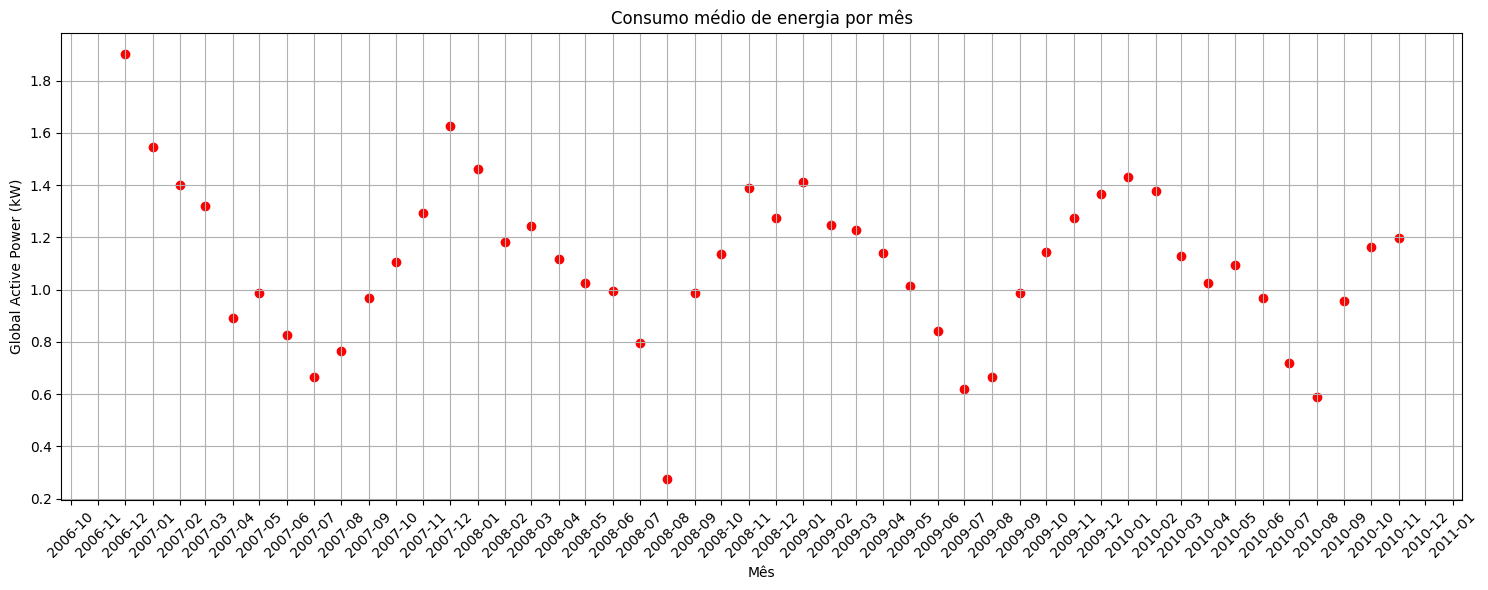

In [ ]:
# Plotando gráfico de dispersão
plt.figure(figsize=(15,6))
plt.scatter(consumo_medio_mensal['Data'], consumo_medio_mensal['Global_active_power'], color='red')
plt.title("Consumo médio de energia por mês")
plt.xlabel("Mês")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)

# Mês em mês
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exercício 9 — Dia com maior consumo de energia ativa global

**Enunciado**  
Identificar o dia em que ocorreu o maior consumo de energia ativa global (`Global_active_power`) somando o valor diário.

---

**Objetivo**  
- Calcular o consumo diário total de energia ativa global.  
- Encontrar a data em que esse consumo foi máximo.  
- Exibir o valor total consumido nesse dia.

---

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')
df['OnlyDate'] = df['DateTime'].dt.date

# Consumo diário
consumo_diario = df.groupby('OnlyDate')['Global_active_power'].sum().reset_index()

# Encontrando o dia com maior consumo
dia_max_consumo = consumo_diario.loc[consumo_diario['Global_active_power'].idxmax()]

print("Dia com maior consumo de energia ativa global:")
print(dia_max_consumo)

Dia com maior consumo de energia ativa global:
OnlyDate               2006-12-23
Global_active_power      4773.386
Name: 7, dtype: object


## Exercício 10 — Comparação de consumo médio: Dias da semana X Fim de semana

**Enunciado**  
Comparar o consumo médio de energia ativa global (`Global_active_power`) entre dias úteis (segunda a sexta) e finais de semana (sábado e domingo).

---

**Objetivo**  
- Separar os registros entre dias úteis e finais de semana.  
- Calcular a média de consumo de energia para cada categoria.  
- Observar se existe diferença significativa entre o consumo em dias de semana e nos finais de semana.  

---


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'], errors='coerce')
df['Dia_da_semana'] = df['DateTime'].dt.dayofweek

# Dia da semana / Fds
df['Tipo_dia'] = df['Dia_da_semana'].apply(lambda x: 'Final de semana' if x >= 5 else 'Dia de semana')

# Calculando consumo médio para cada categoria
consumo_medio_tipo = df.groupby('Tipo_dia')['Global_active_power'].mean().reset_index()

print(consumo_medio_tipo)


          Tipo_dia  Global_active_power
0    Dia de semana             1.035472
1  Final de semana             1.234232


## Exercício 11 — Correlação entre variáveis principais

**Enunciado**  
Analisar as correlações entre as variáveis principais do dataset (`Global_active_power`, `Global_reactive_power`, `Voltage` e `Global_intensity`), utilizando uma matriz de correlação e visualização em mapa de calor.

---

**Objetivo**  
- Calcular a matriz de correlação entre variáveis elétricas principais.  
- Representar graficamente as correlações com um **heatmap** para facilitar a interpretação.  
- Identificar relações fortes (positivas ou negativas) entre variáveis.  

---


Matriz de correlação:
                       Global_active_power  Global_reactive_power  Voltage  \
Global_active_power                  1.000                  0.247   -0.400   
Global_reactive_power                0.247                  1.000   -0.112   
Voltage                             -0.400                 -0.112    1.000   
Global_intensity                     0.999                  0.266   -0.411   

                       Global_intensity  
Global_active_power               0.999  
Global_reactive_power             0.266  
Voltage                          -0.411  
Global_intensity                  1.000  


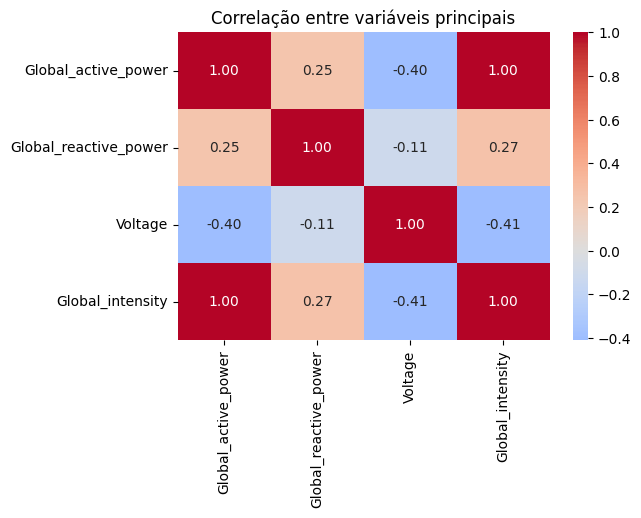

In [ ]:
# Selecionar apenas as colunas relevantes
cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]

# Converter para numérico (garantia extra caso ainda tenha valores como string)
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Calcular a matriz de correlação
corr = df[cols].corr()

print("Matriz de correlação:")
print(corr.round(3))

# Plotar mapa de calor simples
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlação entre variáveis principais")
plt.show()


## Exercício 12 — Criar `Total_Sub_metering` e exibir consumo médio por mês em gráfico de dispersão

**Enunciado**  
Somar as variáveis de medição (`Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3`) para criar uma nova coluna `Total_Sub_metering`.  
Em seguida, calcular o consumo médio mensal e exibir em gráfico de dispersão para analisar variações e possíveis anomalias.

---

**Objetivo**  
- Criar a variável `Total_Sub_metering` que representa o consumo total registrado pelos três medidores.  
- Calcular o consumo médio por mês.  
- Identificar padrões sazonais e verificar anomalias, como o **baixo consumo observado em agosto de 2008**.  
- Visualizar os resultados em um gráfico de dispersão.

---


In [ ]:
# Garantir que as colunas são numéricas
for c in ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Criar a nova coluna
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

# Exibir as primeiras linhas para conferir
print(df[["Sub_metering_1","Sub_metering_2","Sub_metering_3","Total_Sub_metering"]].head())



   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


## Exercício 13 — Verificar meses em que `Total_Sub_metering` ultrapassa a média de `Global_active_power`

**Enunciado**  
Verificar, mês a mês, se a soma do consumo registrado pelos medidores (`Total_Sub_metering`) ultrapassa a média do consumo de energia ativa global (`Global_active_power`).

---

**Objetivo**  
- Calcular o consumo mensal total de `Total_Sub_metering`.  
- Calcular a média mensal de `Global_active_power`.  
- Comparar os dois valores para cada mês.  
- Identificar os meses em que o valor de `Total_Sub_metering` foi superior à média de `Global_active_power`.  

---

In [ ]:
# Garantir que a coluna foi criada (caso não tenha rodado o exercício 12)
if "Total_Sub_metering" not in df.columns:
    df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

# Definir ano e mês
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month

# Calcular soma mensal do Total_Sub_metering
sum_sub_month = df.groupby(["Year","Month"])["Total_Sub_metering"].sum()

# Calcular média mensal de Global_active_power
mean_gap_month = df.groupby(["Year","Month"])["Global_active_power"].mean()

# Comparar
comparacao = pd.DataFrame({
    "Total_Sub_metering_sum": sum_sub_month,
    "Global_active_power_mean": mean_gap_month
})

comparacao["Ultrapassa?"] = comparacao["Total_Sub_metering_sum"] > comparacao["Global_active_power_mean"]

print(comparacao)

# Mostrar apenas os meses em que ultrapassa
print("\nMeses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(comparacao[comparacao["Ultrapassa?"] == True])


            Total_Sub_metering_sum  Global_active_power_mean  Ultrapassa?
Year Month                                                               
2006 12                   239123.0                  1.901295         True
2007 1                    465285.0                  1.546034         True
     2                    382462.0                  1.401084         True
     3                    455892.0                  1.318627         True
     4                    269998.0                  0.891189         True
     5                    377317.0                  0.985862         True
     6                    318462.0                  0.826814         True
     7                    253600.0                  0.667367         True
     8                    311404.0                  0.764186         True
     9                    354493.0                  0.969318         True
     10                   387212.0                  1.103911         True
     11                   424179.0    

## Exercício 14 — Série temporal do Voltage em 2008

**Enunciado**  
Gerar uma série temporal da variável `Voltage` apenas para o ano de 2008, exibindo a variação dos valores ao longo do tempo em gráfico de linha.

---

**Objetivo**  
- Filtrar os registros do ano de 2008.  
- Exibir a evolução da variável `Voltage` ao longo dos meses em gráfico de série temporal.  
- Identificar oscilações, tendências ou picos anormais de tensão elétrica durante o ano.  

---

Registros de 2008: 527040


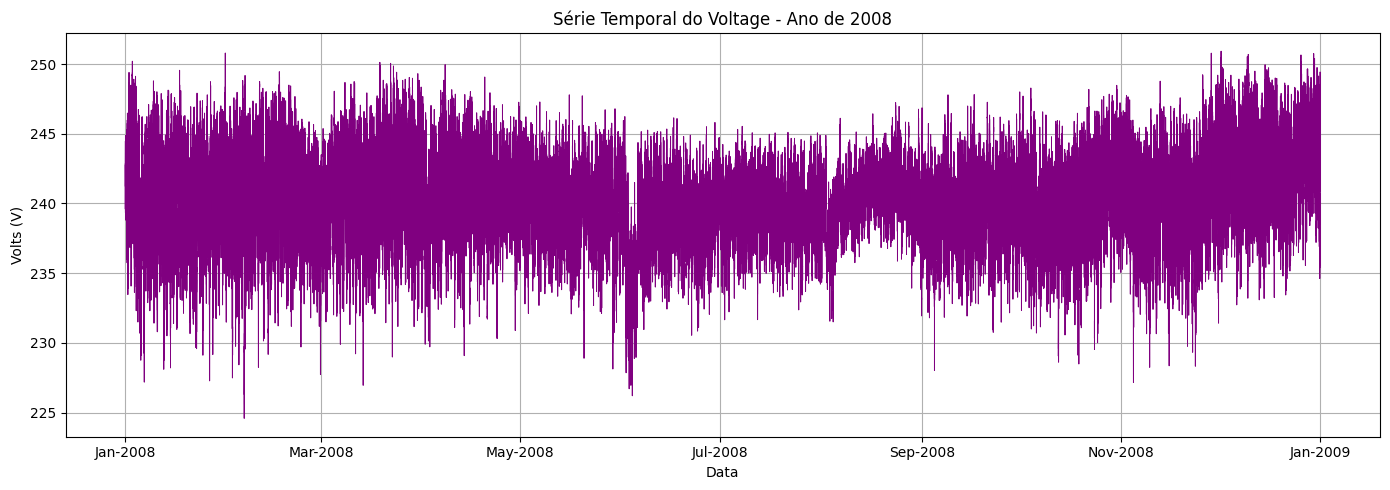

In [ ]:
# Garantir que Voltage está numérico
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")

# Filtrar apenas 2008
df_2008 = df[df["DateTime"].dt.year == 2008]

print("Registros de 2008:", df_2008.shape[0])

# Gráfico
plt.figure(figsize=(14,5))
plt.plot(df_2008["DateTime"], df_2008["Voltage"], color="purple", linewidth=0.7)
plt.title("Série Temporal do Voltage - Ano de 2008")
plt.xlabel("Data")
plt.ylabel("Volts (V)")
plt.grid(True)

# Ticks a cada 2 meses para não ficar poluído
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.tight_layout()
plt.show()


## Exercício 15 — Comparar consumo entre verão e inverno

**Enunciado**  
Comparar o consumo médio de energia ativa global (`Global_active_power`) entre os meses de verão e de inverno, considerando o hemisfério norte.

---

**Objetivo**  
- Definir meses de **verão** (Junho, Julho e Agosto).  
- Definir meses de **inverno** (Dezembro, Janeiro e Fevereiro).  
- Calcular o consumo médio de energia ativa global em cada estação.  
- Verificar diferenças no padrão de consumo entre os períodos de verão e inverno.  

---


In [ ]:


# Garantir que Global_active_power está numérico
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

# Extrair ano e mês
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month

# Definir meses de verão e inverno (hemisfério norte)
verao = [6, 7, 8]     # Junho, Julho, Agosto
inverno = [12, 1, 2]  # Dezembro, Janeiro, Fevereiro

# Calcular média de consumo por estação
media_verao = df[df["Month"].isin(verao)]["Global_active_power"].mean()
media_inverno = df[df["Month"].isin(inverno)]["Global_active_power"].mean()

print(f"Média consumo VERÃO (Jun-Jul-Ago): {media_verao:.3f} kW")
print(f"Média consumo INVERNO (Dez-Jan-Fev): {media_inverno:.3f} kW")




Média consumo VERÃO (Jun-Jul-Ago): 0.727 kW
Média consumo INVERNO (Dez-Jan-Fev): 1.418 kW


## Exercício 16 — Amostragem aleatória de 1% e comparação de distribuição

**Enunciado**  
Selecionar uma amostra aleatória correspondente a 1% dos dados do dataset e comparar a distribuição da variável `Global_active_power` entre a base completa e a amostra, tanto com estatísticas descritivas quanto com visualização gráfica.

---

**Objetivo**  
- Selecionar aleatoriamente 1% da base de dados.  
- Calcular estatísticas descritivas da variável `Global_active_power` para a base completa e para a amostra.  
- Comparar as distribuições utilizando histogramas sobrepostos.  
- Avaliar se a amostra representa bem a população (base completa).  

---


Tamanho da base completa: 2075259
Tamanho da amostra 1%: 20753

--- Estatísticas base completa ---
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

--- Estatísticas amostra 1% ---
count    20486.000000
mean         1.097499
std          1.049284
min          0.078000
25%          0.308000
50%          0.608000
75%          1.542000
max          7.878000
Name: Global_active_power, dtype: float64


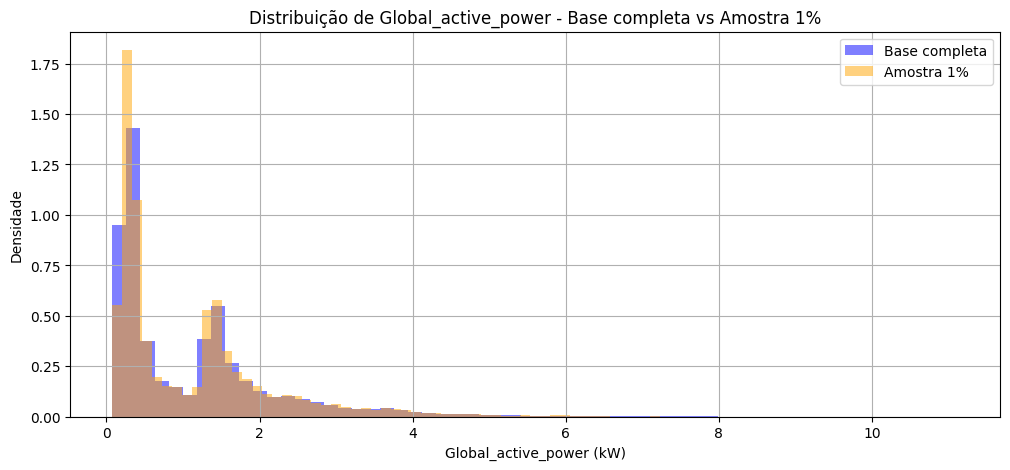

In [ ]:
# Garantir que Global_active_power está numérico
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

# Amostra aleatória de 1%
sample_df = df.sample(frac=0.01, random_state=42)

print("Tamanho da base completa:", df.shape[0])
print("Tamanho da amostra 1%:", sample_df.shape[0])

# Estatísticas descritivas
print("\n--- Estatísticas base completa ---")
print(df["Global_active_power"].describe())

print("\n--- Estatísticas amostra 1% ---")
print(sample_df["Global_active_power"].describe())

# Comparação visual com histogramas
plt.figure(figsize=(12,5))
plt.hist(df["Global_active_power"].dropna(), bins=60, alpha=0.5, label="Base completa", density=True, color="blue")
plt.hist(sample_df["Global_active_power"].dropna(), bins=60, alpha=0.5, label="Amostra 1%", density=True, color="orange")
plt.title("Distribuição de Global_active_power - Base completa vs Amostra 1%")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()


## Exercício 17 — Normalização Min-Max nas variáveis numéricas principais

**Enunciado**  
Aplicar a técnica de normalização **Min-Max Scaling** às principais variáveis numéricas do dataset (`Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`, `Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3` e `Total_Sub_metering`), transformando seus valores para o intervalo [0, 1].

---

**Objetivo**  
- Garantir que todas as variáveis numéricas estejam devidamente convertidas.  
- Aplicar a técnica de normalização Min-Max para escalar os valores entre 0 e 1.  
- Criar um novo DataFrame com as colunas normalizadas.  
- Conferir os primeiros registros para validar a transformação.  

---


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar variáveis numéricas principais
num_cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
    "Total_Sub_metering"
]

# Garantir que todas são numéricas
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[num_cols])

# Criar DataFrame normalizado
df_scaled = pd.DataFrame(scaled_values, columns=[col + "_scaled" for col in num_cols])

# Exibir primeiras linhas para conferir
print(df_scaled.head())


   Global_active_power_scaled  Global_reactive_power_scaled  Voltage_scaled  \
0                    0.374796                      0.300719        0.376090   
1                    0.478363                      0.313669        0.336995   
2                    0.479631                      0.358273        0.326010   
3                    0.480898                      0.361151        0.340549   
4                    0.325005                      0.379856        0.403231   

   Global_intensity_scaled  Sub_metering_1_scaled  Sub_metering_2_scaled  \
0                 0.377593                    0.0                 0.0125   
1                 0.473029                    0.0                 0.0125   
2                 0.473029                    0.0                 0.0250   
3                 0.473029                    0.0                 0.0125   
4                 0.323651                    0.0                 0.0125   

   Sub_metering_3_scaled  Total_Sub_metering_scaled  
0             

## Exercício 18 — K-means para segmentar dias em 3 grupos de consumo

**Enunciado**  
Aplicar o algoritmo de clustering **K-means** para segmentar os dias do dataset em 3 grupos distintos, com base no consumo médio diário de energia ativa global (`Global_active_power`).  

---

**Objetivo**  
- Calcular a média diária do consumo de energia ativa global.  
- Preparar os dados removendo valores ausentes e aplicando escalonamento (padronização).  
- Utilizar o algoritmo K-means para criar **3 clusters** de consumo diário.  
- Reetiquetar os clusters em ordem de intensidade (baixo, médio e alto consumo).  
- Exibir um resumo estatístico de cada cluster (quantidade de dias, média, mediana e desvio-padrão).  
- Plotar um gráfico de dispersão mostrando os clusters de consumo ao longo do tempo.  

---


Dias válidos para clustering: 1433

Resumo por cluster (consumo médio diário em kW):
           count   mean  median    std
Baixo (0)    514  0.680   0.743  0.201
Médio (1)    724  1.189   1.169  0.154
Alto (2)     195  1.819   1.725  0.307


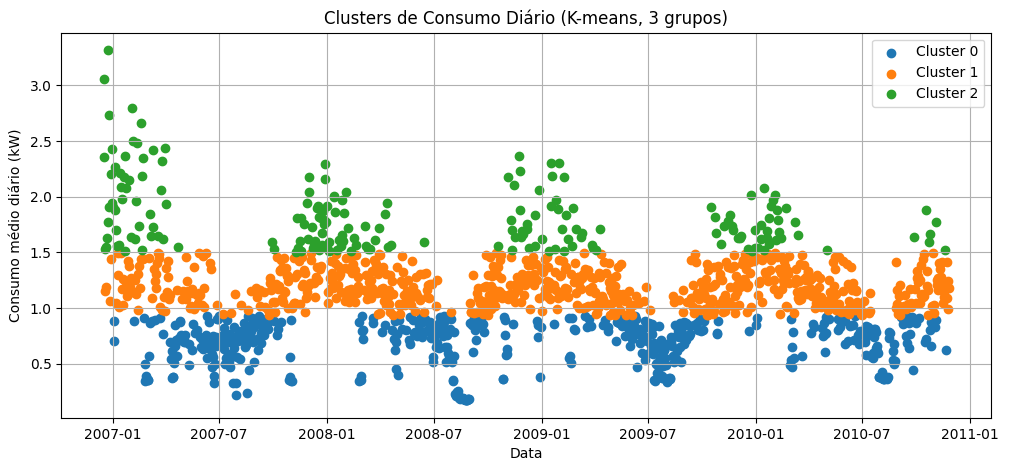

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 0) Garantias básicas
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

# 1) Série diária (média por dia). Usando resample no índice temporal:
df_idx = df.set_index("DateTime").sort_index()

# Média diária; se um dia não tiver leituras válidas, vira NaN
daily_mean = df_idx["Global_active_power"].resample("D").mean()

# Opcional: exigir um mínimo de amostras por dia (ex.: >= 30 minutos medidos)
# counts = df_idx["Global_active_power"].resample("D").count()
# daily_mean[counts < 30] = np.nan

# 2) Remover dias NaN (ou troque por imputação se preferir)
daily = daily_mean.dropna().to_frame(name="Mean_Global_active_power").reset_index()  # colunas: Date, Mean_Global_active_power
daily.rename(columns={"DateTime": "Date"}, inplace=True)

print(f"Dias válidos para clustering: {len(daily)}")

# 3) Escalar
scaler = StandardScaler()
X = scaler.fit_transform(daily[["Mean_Global_active_power"]])

# 4) K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
daily["Cluster_raw"] = labels

# 5) Re-rotular clusters por nível de consumo (baixo/médio/alto)
cluster_means = daily.groupby("Cluster_raw")["Mean_Global_active_power"].mean().sort_values()
mapping = {old: new for new, old in enumerate(cluster_means.index)}  # menor média -> 0, depois 1, depois 2
daily["Cluster"] = daily["Cluster_raw"].map(mapping)

# 6) Resumo
summary = daily.groupby("Cluster")["Mean_Global_active_power"].agg(["count","mean","median","std"]).round(3)
summary.index = ["Baixo (0)","Médio (1)","Alto (2)"]
print("\nResumo por cluster (consumo médio diário em kW):")
print(summary)

# 7) Visualização
plt.figure(figsize=(12,5))
for c in sorted(daily["Cluster"].unique()):
    subset = daily[daily["Cluster"] == c]
    plt.scatter(subset["Date"], subset["Mean_Global_active_power"], label=f"Cluster {c}")
plt.title("Clusters de Consumo Diário (K-means, 3 grupos)")
plt.xlabel("Data")
plt.ylabel("Consumo médio diário (kW)")
plt.legend()
plt.grid(True)
plt.show()


## Exercício 19 — Decomposição de série temporal

**Enunciado**  
Aplicar a técnica de **decomposição de série temporal** sobre a variável `Global_active_power` em um período específico (ex.: janeiro a junho de 2008), separando os componentes de tendência, sazonalidade e resíduos.

---

**Objetivo**  
- Filtrar um intervalo de tempo definido (6 meses).  
- Realizar agregação diária para reduzir a granularidade dos dados.  
- Aplicar decomposição aditiva da série temporal.  
- Analisar os componentes da série:  
  - **Tendência (Trend):** evolução geral ao longo do tempo.  
  - **Sazonalidade (Seasonal):** padrões recorrentes, como ciclos mensais ou semanais.  
  - **Resíduos (Residual):** variações não explicadas pela tendência ou sazonalidade.  

---


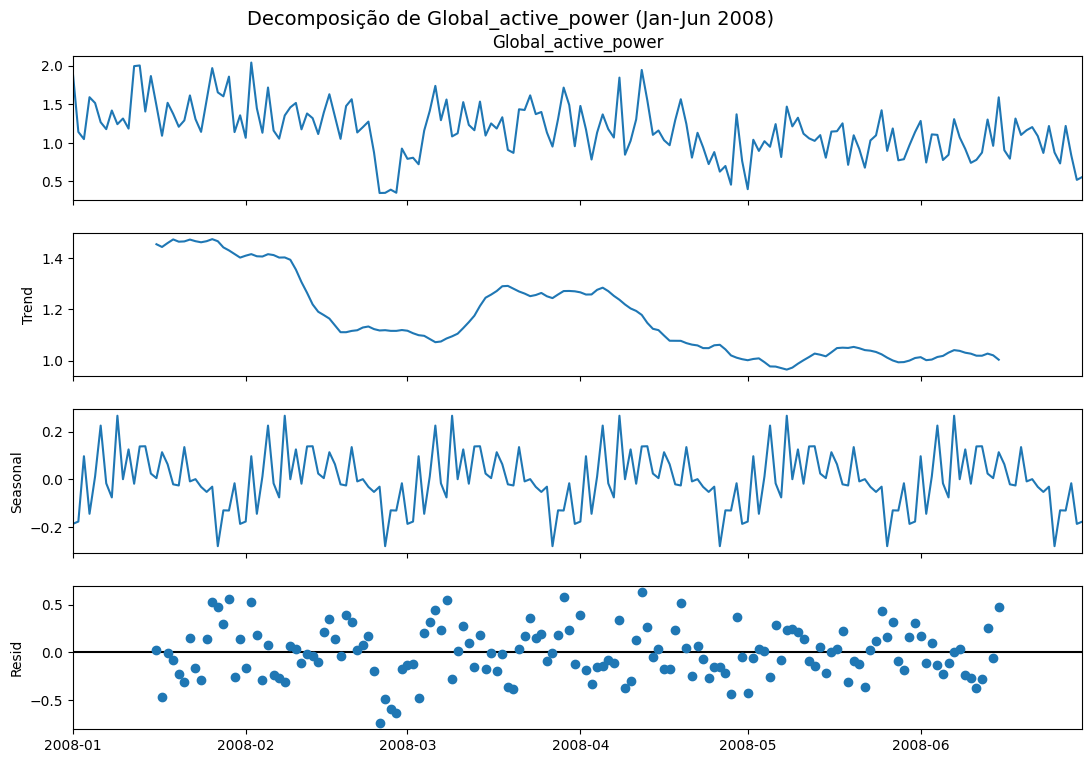

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Garantir que está no formato datetime index
df_idx = df.set_index("DateTime").sort_index()

# Filtrar um período de 6 meses (exemplo: Jan a Jun de 2008)
periodo = df_idx.loc["2008-01-01":"2008-06-30", "Global_active_power"]

# Remover valores ausentes
periodo = periodo.dropna()

# Resample para médias diárias (decomposição fica mais clara em dados agregados)
periodo_daily = periodo.resample("D").mean()

# Aplicar decomposição aditiva
decomposition = seasonal_decompose(periodo_daily, model="additive", period=30)  # ~30 dias para sazonalidade mensal

# Plotar resultado
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Decomposição de Global_active_power (Jan-Jun 2008)", fontsize=14)
plt.show()


## Exercício 20 — Regressão Linear Simples

**Enunciado**  
Aplicar um modelo de **Regressão Linear Simples** para prever a variável `Global_active_power` a partir da variável `Global_intensity`, avaliando o desempenho do modelo e visualizando os resultados.

---

**Objetivo**  
- Garantir que as variáveis `Global_active_power` e `Global_intensity` sejam numéricas.  
- Dividir os dados em conjuntos de treino e teste.  
- Treinar um modelo de Regressão Linear Simples.  
- Calcular métricas de avaliação do modelo (MAE, MSE, RMSE e R²).  
- Plotar um gráfico mostrando os valores reais e a reta de regressão ajustada.  

---


Coeficiente angular (beta1): 0.23762614172463653
Intercepto (beta0): -0.008059125001929068
MAE: 0.034
MSE: 0.002
RMSE: 0.050
R²: 0.998


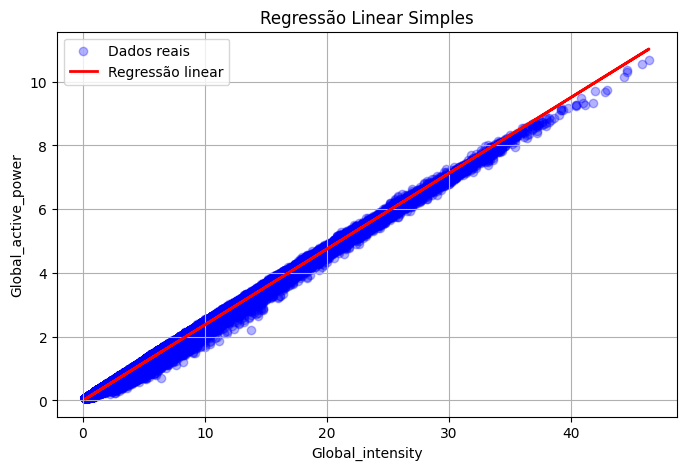

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Garantir que colunas são numéricas
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"], errors="coerce")

# Remover NaN
data = df.dropna(subset=["Global_active_power", "Global_intensity"])

X = data[["Global_intensity"]]  # variáveis explicativas (2D)
y = data["Global_active_power"] # variável alvo

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficiente angular (beta1):", model.coef_[0])
print("Intercepto (beta0):", model.intercept_)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Visualização
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.3, label="Dados reais", color="blue")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regressão linear")
plt.xlabel("Global_intensity")
plt.ylabel("Global_active_power")
plt.title("Regressão Linear Simples")
plt.legend()
plt.grid(True)
plt.show()


## Exercício 21 — Séries temporais por hora

**Enunciado**  
Analisar o consumo médio horário da variável `Global_active_power`, identificando as horas do dia com maior demanda e representando a série temporal em diferentes formas de visualização.

---

**Objetivo**  
- Reamostrar os dados para médias horárias.  
- Calcular o consumo médio por cada hora do dia (0h a 23h).  
- Identificar as horas de maior consumo médio.  
- Plotar a série temporal por hora ao longo do período analisado.  
- Plotar também o perfil médio diário (0–23h), destacando os horários de pico.  

---


/tmp/ipython-input-625542816.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df_idx["Global_active_power"].resample("H").mean()


Primeiras horas:
DateTime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Freq: h, Name: Global_active_power, dtype: float64

Consumo médio por hora do dia (0h-23h):
DateTime
0     0.660
1     0.539
2     0.481
3     0.445
4     0.444
5     0.454
6     0.792
7     1.502
8     1.461
9     1.332
10    1.261
11    1.246
12    1.207
13    1.144
14    1.083
15    0.991
16    0.949
17    1.056
18    1.326
19    1.733
20    1.899
21    1.876
22    1.413
23    0.902
Name: Global_active_power, dtype: float64

Top 5 horários de maior consumo médio:
DateTime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
Name: Global_active_power, dtype: float64


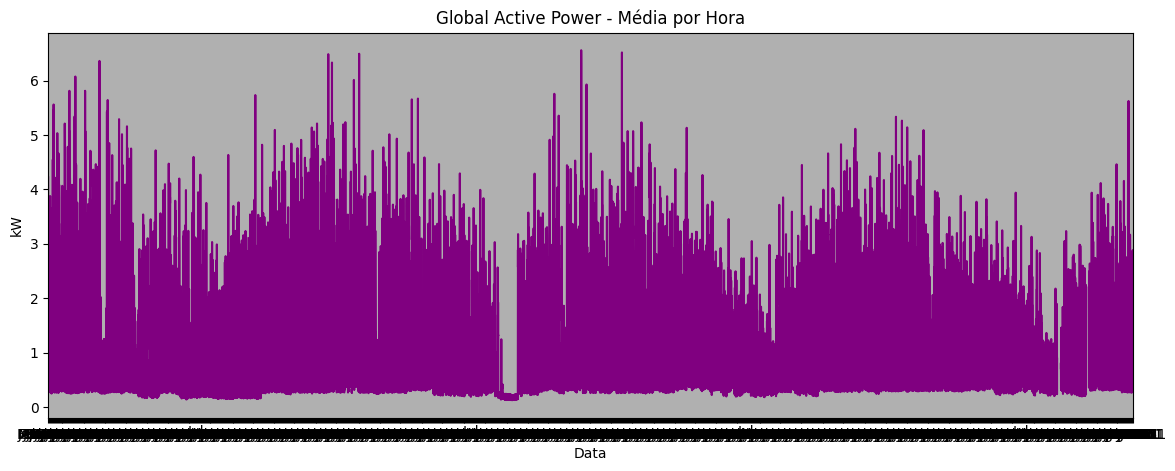

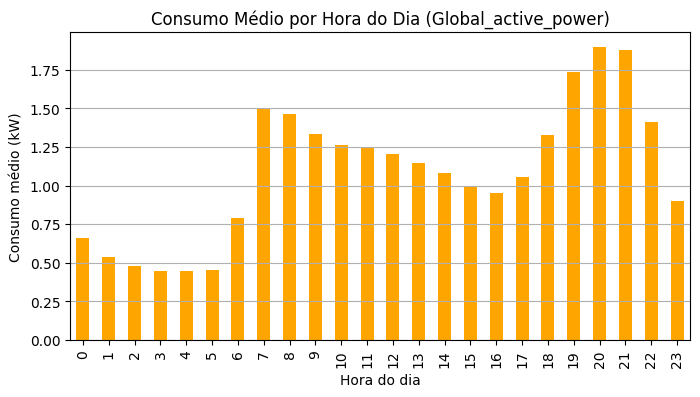

In [ ]:
# 1) Garantir que o DateTime existe
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"],
                                format="%d/%m/%Y %H:%M:%S", errors="coerce")

# 2) Definir como índice temporal
df_idx = df.set_index("DateTime").sort_index()

# 3) Reamostrar por hora, pegando a média de Global_active_power
hourly = df_idx["Global_active_power"].resample("H").mean()

print("Primeiras horas:")
print(hourly.head())

# 4) Descobrir quais horas do dia têm maior consumo médio
hourly_by_hour = hourly.groupby(hourly.index.hour).mean()

print("\nConsumo médio por hora do dia (0h-23h):")
print(hourly_by_hour.round(3))

top_horas = hourly_by_hour.sort_values(ascending=False).head(5)
print("\nTop 5 horários de maior consumo médio:")
print(top_horas)

# 5) Plotar a série temporal por hora (todo período)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,5))
hourly.plot(color="purple")
plt.title("Global Active Power - Média por Hora")
plt.xlabel("Data")
plt.ylabel("kW")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.grid(True)
plt.show()

# 6) Plotar perfil médio diário (0-23h)
plt.figure(figsize=(8,4))
hourly_by_hour.plot(kind="bar", color="orange")
plt.title("Consumo Médio por Hora do Dia (Global_active_power)")
plt.xlabel("Hora do dia")
plt.ylabel("Consumo médio (kW)")
plt.grid(True, axis="y")
plt.show()


## Exercício 22 — Autocorrelação do consumo

**Enunciado**  
Analisar a **autocorrelação** da variável `Global_active_power` em diferentes defasagens (lags), verificando se existem padrões de repetição no consumo de energia ao longo do tempo.

---

**Objetivo**  
- Reamostrar os dados em médias horárias.  
- Calcular a autocorrelação para diferentes lags (1h, 24h e 48h).  
- Interpretar os resultados, observando se o consumo em determinado horário está correlacionado com períodos anteriores.  
- Plotar o gráfico de autocorrelação até 72 horas para identificar ciclos e padrões de repetição.  

---


/tmp/ipython-input-968868463.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df_idx["Global_active_power"].resample("H").mean().dropna()


Autocorrelação (lag 1h):  0.713
Autocorrelação (lag 24h): 0.435
Autocorrelação (lag 48h): 0.399


<Figure size 1000x400 with 0 Axes>

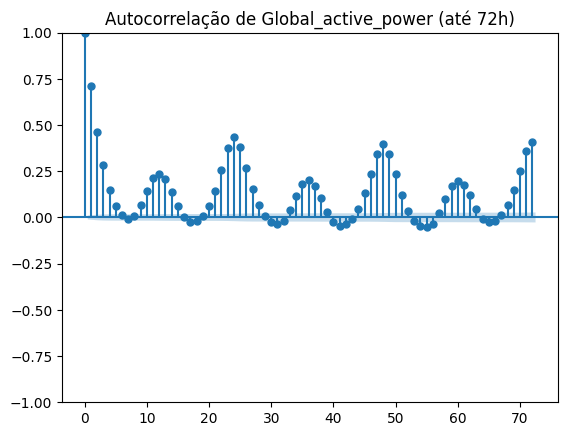

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que temos um índice temporal
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"],
                                format="%d/%m/%Y %H:%M:%S", errors="coerce")
df_idx = df.set_index("DateTime").sort_index()

# Série temporal horária
hourly = df_idx["Global_active_power"].resample("H").mean().dropna()

# Calcular autocorrelações
lag1  = hourly.autocorr(lag=1)    # 1 hora
lag24 = hourly.autocorr(lag=24)   # 24 horas
lag48 = hourly.autocorr(lag=48)   # 48 horas

print("Autocorrelação (lag 1h): ", round(lag1, 3))
print("Autocorrelação (lag 24h):", round(lag24, 3))
print("Autocorrelação (lag 48h):", round(lag48, 3))

# Plotar gráfico de autocorrelação até 72h
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,4))
plot_acf(hourly, lags=72)
plt.title("Autocorrelação de Global_active_power (até 72h)")
plt.show()


## Exercício 23 — PCA com 4 variáveis → 2 componentes principais

**Enunciado**  
Aplicar a técnica de **Análise de Componentes Principais (PCA)** para reduzir a dimensionalidade de 4 variáveis do dataset (`Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`) para apenas 2 componentes principais, mantendo o máximo possível da variância dos dados.

---

**Objetivo**  
- Selecionar as variáveis numéricas principais.  
- Escalar os dados (normalização é essencial para PCA).  
- Aplicar o PCA para reduzir de 4 para 2 componentes.  
- Calcular e exibir a variância explicada por cada componente.  
- Plotar os dados em um gráfico de dispersão com base nas duas componentes principais.  

---




Variância explicada por cada componente:
Componente 1: 59.10%
Componente 2: 22.72%
Total: 81.82%


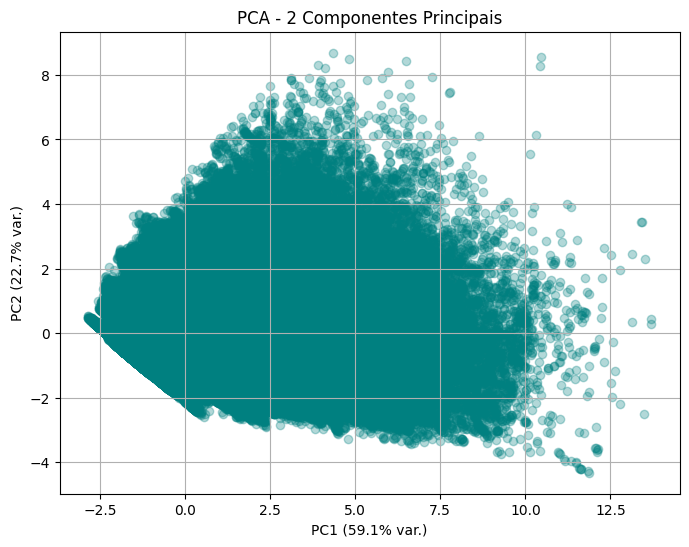

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar variáveis
cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]

# Garantir numéricas
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Remover NaN
pca_data = df[cols].dropna()

# Escalar (muito importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data)

# PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variância explicada
explained_var = pca.explained_variance_ratio_

print("Variância explicada por cada componente:")
print(f"Componente 1: {explained_var[0]*100:.2f}%")
print(f"Componente 2: {explained_var[1]*100:.2f}%")
print(f"Total: {(explained_var.sum())*100:.2f}%")

# DataFrame com componentes
df_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])

# Plotar dispersão
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.3, color="teal")
plt.title("PCA - 2 Componentes Principais")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% var.)")
plt.grid(True)
plt.show()


## Exercício 24 — PCA + KMeans (3 clusters)

**Enunciado**  
Aplicar a técnica de **PCA (Análise de Componentes Principais)** para reduzir as variáveis (`Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`) para 2 componentes principais e, em seguida, aplicar o algoritmo **K-means** para agrupar os dados em 3 clusters.

---

**Objetivo**  
- Reutilizar os dados já normalizados do exercício 23.  
- Reduzir a dimensionalidade para 2 componentes principais com PCA.  
- Aplicar o algoritmo K-means para segmentar os dados em 3 clusters distintos.  
- Criar um DataFrame com os resultados (PC1, PC2 e Cluster).  
- Plotar os clusters no espaço bidimensional definido pelos 2 componentes principais.  

---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


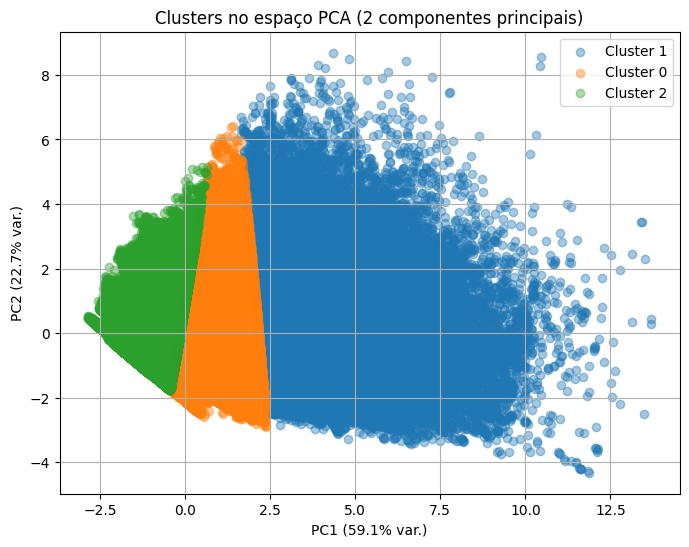

In [ ]:
from sklearn.cluster import KMeans

# Reutilizar os dados normalizados do exercício 23
cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
pca_data = df[cols].dropna()

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data)

# PCA (2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Criar DataFrame para visualização
df_pca_clusters = pd.DataFrame(X_pca, columns=["PC1","PC2"])
df_pca_clusters["Cluster"] = clusters

# Plot
plt.figure(figsize=(8,6))
for c in df_pca_clusters["Cluster"].unique():
    subset = df_pca_clusters[df_pca_clusters["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], alpha=0.4, label=f"Cluster {c}")

plt.title("Clusters no espaço PCA (2 componentes principais)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var.)")
plt.legend()
plt.grid(True)
plt.show()


## Exercício 25 — Regressão Linear Simples vs Polinomial

**Enunciado**  
Comparar o desempenho de um modelo de **Regressão Linear Simples** com um modelo de **Regressão Polinomial (grau 2)** para prever a variável `Global_active_power` a partir da variável `Voltage`.

---

**Objetivo**  
- Garantir que as variáveis `Global_active_power` e `Voltage` sejam numéricas.  
- Treinar um modelo de Regressão Linear Simples.  
- Treinar um modelo de Regressão Polinomial de grau 2.  
- Calcular e comparar o erro (RMSE) dos dois modelos.  
- Plotar um gráfico comparando os dados reais com as curvas ajustadas pelos modelos Linear e Polinomial.  

---


RMSE Linear: 0.969
RMSE Polinomial (grau 2): 0.965


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


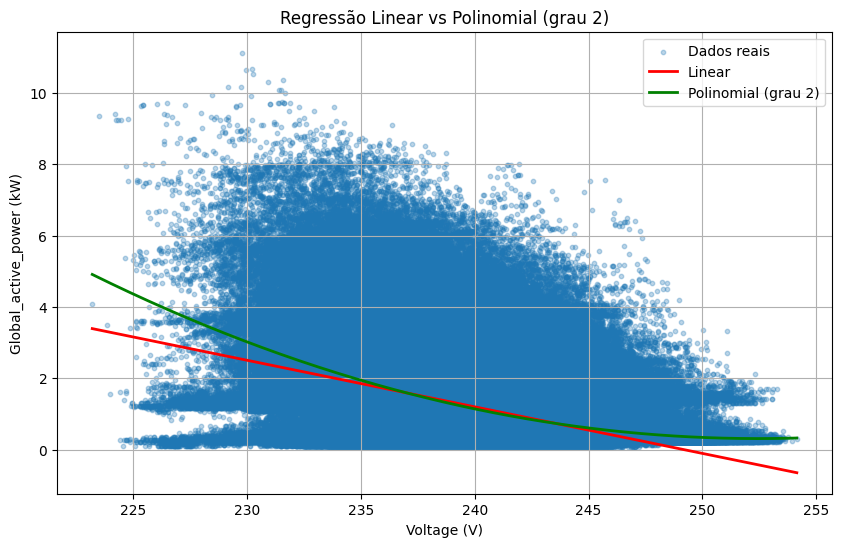

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Garantir que colunas são numéricas
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")

# Selecionar dados válidos
data = df.dropna(subset=["Global_active_power","Voltage"])

X = data[["Voltage"]]
y = data["Global_active_power"]

# --- Regressão Linear ---
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))

# --- Regressão Polinomial (grau 2) ---
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

# Resultados
print("RMSE Linear:", round(rmse_lin, 3))
print("RMSE Polinomial (grau 2):", round(rmse_poly, 3))

# --- Visualização ---
# Amostra de pontos para curva
X_range = np.linspace(X["Voltage"].min(), X["Voltage"].max(), 300).reshape(-1,1)
y_lin_line = lin_model.predict(X_range)
y_poly_line = poly_model.predict(poly.transform(X_range))

plt.figure(figsize=(10,6))
plt.scatter(X, y, s=10, alpha=0.3, label="Dados reais")
plt.plot(X_range, y_lin_line, color="red", linewidth=2, label="Linear")
plt.plot(X_range, y_poly_line, color="green", linewidth=2, label="Polinomial (grau 2)")
plt.xlabel("Voltage (V)")
plt.ylabel("Global_active_power (kW)")
plt.title("Regressão Linear vs Polinomial (grau 2)")
plt.legend()
plt.grid(True)
plt.show()


# PARTE 3 – Novo dataset Appliances Energy Prediction
Dataset escolhido:
- Appliances energy prediction dataset
https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
- Contém consumo de energia (Appliances) e variáveis ambientais (temperatura, umidade,
condições internas/externas).

## Exercício 26 — Carregamento e inspeção inicial

**Enunciado**  
Carregar o dataset **Appliances Energy Prediction** e realizar uma inspeção inicial, verificando suas primeiras linhas, estrutura geral e estatísticas descritivas.

---

**Objetivo**  
- Carregar o dataset `energydata_complete.csv`.  
- Visualizar as 5 primeiras linhas para entender a estrutura básica dos dados.  
- Verificar informações gerais do dataset (`.info()`), incluindo número de registros, colunas e tipos de dados.  
- Gerar estatísticas descritivas das variáveis numéricas (`.describe()`), como média, desvio-padrão, mínimos e máximos.  

---


In [ ]:
import pandas as pd

# Carregar o dataset
df2 = pd.read_csv("energydata_complete.csv")

# Visualizar primeiras linhas
print("🔹 Primeiras 5 linhas do dataset:")
print(df2.head(), "\n")

# Estrutura (tipos de dados, colunas, memória)
print("🔹 Informações gerais (.info()):")
print(df2.info(), "\n")

# Estatísticas descritivas das colunas numéricas
print("🔹 Estatísticas descritivas (.describe()):")
print(df2.describe().T)


🔹 Primeiras 5 linhas do dataset:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   


## Exercício 27 — Distribuição do consumo (Appliances)

**Enunciado**  
Analisar a distribuição do consumo de energia dos eletrodomésticos (`Appliances`), verificando tanto a frequência de valores quanto sua variação ao longo do tempo.

---

**Objetivo**  
- Garantir que a variável `Appliances` esteja em formato numérico.  
- Converter a coluna `date` para o tipo datetime.  
- Plotar um histograma para visualizar a distribuição dos valores de consumo.  
- Gerar um gráfico de série temporal para observar a evolução do consumo ao longo do tempo.  
- Exibir estatísticas descritivas da variável `Appliances` (média, mediana, mínimo, máximo, etc.).  

---


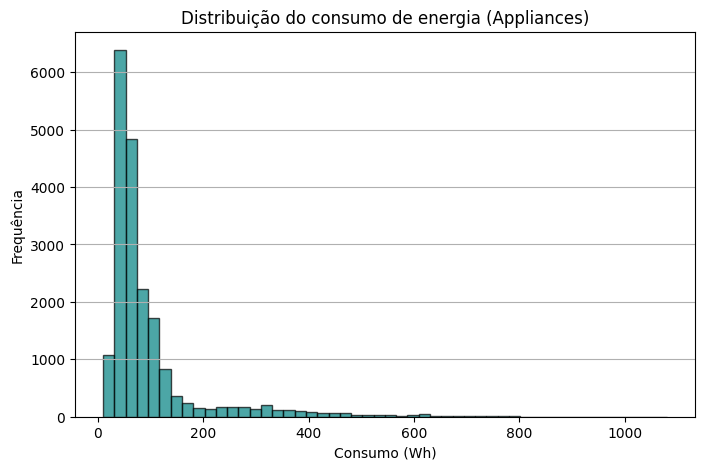

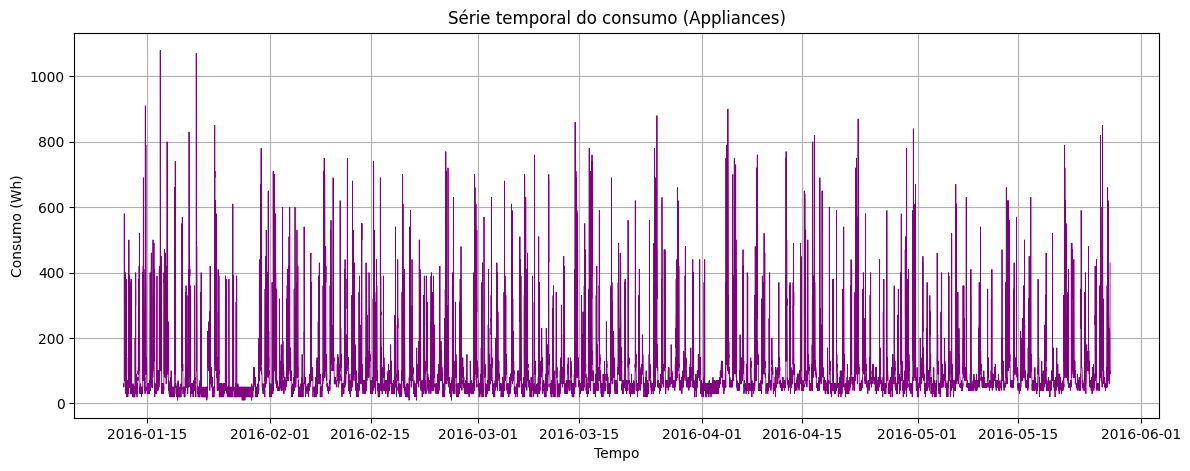

🔹 Estatísticas de Appliances:
count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Garantir que Appliances é numérico
df2["Appliances"] = pd.to_numeric(df2["Appliances"], errors="coerce")

# Converter a coluna de data para datetime
df2["date"] = pd.to_datetime(df2["date"], errors="coerce")

# Histograma do consumo
plt.figure(figsize=(8,5))
plt.hist(df2["Appliances"], bins=50, color="teal", edgecolor="black", alpha=0.7)
plt.title("Distribuição do consumo de energia (Appliances)")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.grid(True, axis="y")
plt.show()

# Série temporal completa
plt.figure(figsize=(14,5))
plt.plot(df2["date"], df2["Appliances"], color="purple", linewidth=0.6)
plt.title("Série temporal do consumo (Appliances)")
plt.xlabel("Tempo")
plt.ylabel("Consumo (Wh)")
plt.grid(True)
plt.show()

# Estatísticas básicas
print("🔹 Estatísticas de Appliances:")
print(df2["Appliances"].describe())


## Exercício 28 — Correlações entre consumo (Appliances) e variáveis ambientais

**Enunciado**  
Investigar como o consumo de energia dos eletrodomésticos (`Appliances`) se relaciona com variáveis ambientais (temperaturas internas/externas, umidades, pressão, velocidade do vento e visibilidade).  

---

**Objetivo**  
- Selecionar as colunas relevantes de variáveis ambientais e o consumo (`Appliances`).  
- Garantir que todos os valores estejam em formato numérico.  
- Calcular a correlação de Pearson entre `Appliances` e cada variável ambiental.  
- Ordenar as correlações para destacar as variáveis com maior influência.  
- Visualizar os resultados em um **heatmap** para facilitar a interpretação.  

---


🔹 Correlações de 'Appliances' com variáveis ambientais:
Appliances     1.000000
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


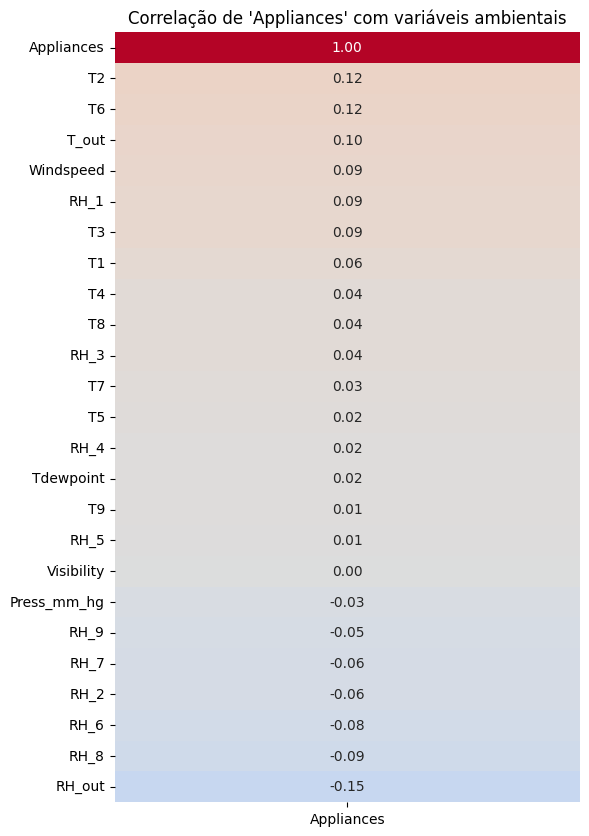

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas de interesse (Appliances + temperaturas + umidades externas e internas)
cols_corr = ["Appliances"] + [c for c in df2.columns if c.startswith("T") or c.startswith("RH") or c in ["T_out", "Press_mm_hg", "Windspeed", "Visibility"]]

# Garantir que tudo é numérico
for c in cols_corr:
    df2[c] = pd.to_numeric(df2[c], errors="coerce")

# Calcular correlação
corr = df2[cols_corr].corr()

# Correlação de Appliances com as variáveis ambientais
appl_corr = corr["Appliances"].sort_values(ascending=False)

print("🔹 Correlações de 'Appliances' com variáveis ambientais:")
print(appl_corr)

# Heatmap focado em Appliances
plt.figure(figsize=(6,10))
sns.heatmap(appl_corr.to_frame(), annot=True, cmap="coolwarm", center=0, cbar=False, fmt=".2f")
plt.title("Correlação de 'Appliances' com variáveis ambientais")
plt.show()


## Exercício 29 — Normalização Min-Max

**Enunciado**  
Aplicar a técnica de normalização **Min-Max** para escalar os valores das variáveis numéricas do dataset, transformando-os para o intervalo `[0, 1]`.

---

**Objetivo**  
- Selecionar apenas as colunas numéricas do dataset.  
- Aplicar a normalização Min-Max para reescalar os valores.  
- Exibir as primeiras linhas já normalizadas.  
- Comparar os intervalos originais e normalizados da variável `Appliances`.  

---


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas colunas numéricas
num_cols = df2.select_dtypes(include=["int64","float64"]).columns

# Instanciar o scaler
scaler = MinMaxScaler()

# Aplicar normalização
df2_scaled = df2.copy()
df2_scaled[num_cols] = scaler.fit_transform(df2[num_cols])

print("🔹 Primeiras linhas normalizadas:")
print(df2_scaled[num_cols].head())

# Exemplo: comparar antes e depois
print("\n🔹 Intervalo original de Appliances:", df2["Appliances"].min(), "->", df2["Appliances"].max())
print("🔹 Intervalo normalizado de Appliances:", df2_scaled["Appliances"].min(), "->", df2_scaled["Appliances"].max())


🔹 Primeiras linhas normalizadas:
   Appliances    lights       T1      RH_1        T2      RH_2        T3  \
0    0.046729  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188   
1    0.046729  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188   
2    0.037383  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188   
3    0.037383  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188   
4    0.046729  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188   

       RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
0  0.746066  0.351351  0.764262  ...  0.223032  0.677290  0.372990   
1  0.748871  0.351351  0.782437  ...  0.226500  0.678532  0.369239   
2  0.755569  0.344745  0.778062  ...  0.219563  0.676049  0.365488   
3  0.758685  0.341441  0.770949  ...  0.219563  0.671909  0.361736   
4  0.758685  0.341441  0.762697  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0     0.

## Exercício 30 — PCA (2 Componentes Principais)

**Enunciado**  
Aplicar a técnica de **Análise de Componentes Principais (PCA)** para reduzir a dimensionalidade do dataset normalizado, projetando as variáveis em 2 componentes principais.

---

**Objetivo**  
- Utilizar os dados já normalizados no exercício anterior (Exercício 29).  
- Calcular os **2 primeiros componentes principais** usando PCA.  
- Criar um DataFrame com os valores projetados.  
- Analisar a variância explicada por cada componente e pelo total.  
- Plotar a dispersão dos dados nos 2 componentes principais.  

---


🔹 Variância explicada pelos 2 componentes principais:
PC1: 36.09%
PC2: 20.91%
Total: 57.00%


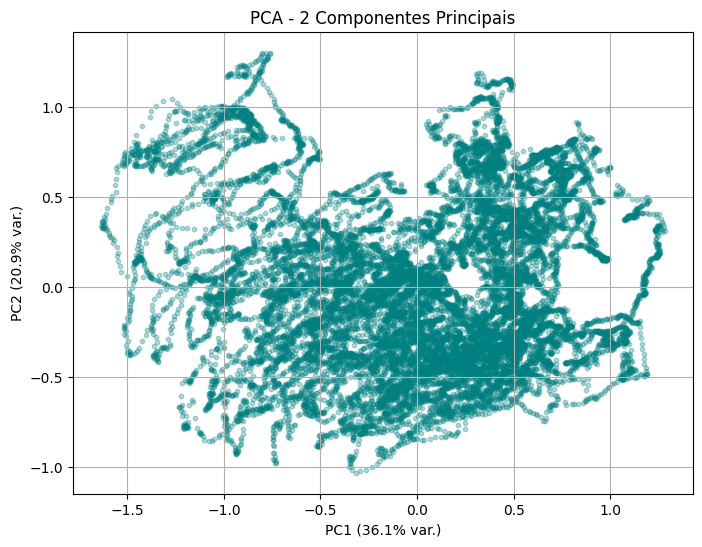

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Usar os dados normalizados do exercício 29
num_cols = df2_scaled.select_dtypes(include=["int64","float64"]).columns

# PCA com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2_scaled[num_cols])

# Criar DataFrame com resultados
df_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])

# Variância explicada
explained_var = pca.explained_variance_ratio_
print("🔹 Variância explicada pelos 2 componentes principais:")
print(f"PC1: {explained_var[0]*100:.2f}%")
print(f"PC2: {explained_var[1]*100:.2f}%")
print(f"Total: {(explained_var.sum())*100:.2f}%")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.3, s=10, color="teal")
plt.title("PCA - 2 Componentes Principais")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% var.)")
plt.grid(True)
plt.show()


## Exercício 31 — Regressão Linear Múltipla

**Enunciado**  
Treinar um modelo de **Regressão Linear Múltipla** para prever o consumo de energia dos eletrodomésticos (`Appliances`) a partir das variáveis ambientais (temperaturas, umidades e variáveis externas).

---

**Objetivo**  
- Selecionar como variáveis preditoras apenas os atributos ambientais.  
- Dividir o dataset em treino e teste.  
- Treinar um modelo de regressão linear múltipla.  
- Realizar previsões sobre o conjunto de teste.  
- Avaliar o desempenho do modelo usando **MAE, MSE, RMSE e R²**.  

---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecionar variáveis ambientais (temperaturas, umidades e externas)
X = df2_scaled.drop(columns=["Appliances", "date", "lights"])  # remove a variável alvo e outras que não são ambientais
y = df2_scaled["Appliances"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔹 Avaliação Regressão Linear Múltipla")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


🔹 Avaliação Regressão Linear Múltipla
MAE:  0.0501
RMSE: 0.0875
R²:   0.1489


## Exercício 32 — Random Forest Regressor

**Enunciado**  
Treinar um modelo de **Random Forest Regressor** para prever o consumo de energia dos eletrodomésticos (`Appliances`) utilizando as mesmas variáveis ambientais do exercício anterior (temperaturas, umidades e variáveis externas).  
Comparar os resultados do modelo de Random Forest com a **Regressão Linear Múltipla** (Exercício 31).  

---

**Objetivo**  
- Usar as mesmas variáveis preditoras do exercício anterior.  
- Dividir o dataset em treino e teste.  
- Treinar o modelo de **Random Forest**.  
- Realizar previsões sobre o conjunto de teste.  
- Avaliar o modelo usando **MAE, MSE, RMSE e R²**.  
- Comparar os resultados com os obtidos na regressão linear múltipla.  

---


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Variáveis preditoras: mesmas usadas na regressão linear múltipla
X = df2_scaled.drop(columns=["Appliances", "date", "lights"])
y = df2_scaled["Appliances"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,       # número de árvores
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🔹 Avaliação Random Forest")
print(f"MAE:  {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²:   {r2_rf:.4f}")

# Comparação com regressão linear
print("\nComparação com Regressão Linear Múltipla (Exercício 31):")
print(f"Linear - RMSE: {rmse:.4f} | R²: {r2:.4f}")
print(f"RF     - RMSE: {rmse_rf:.4f} | R²: {r2_rf:.4f}")


🔹 Avaliação Random Forest
MAE:  0.0300
RMSE: 0.0627
R²:   0.5633

Comparação com Regressão Linear Múltipla (Exercício 31):
Linear - RMSE: 0.0875 | R²: 0.1489
RF     - RMSE: 0.0627 | R²: 0.5633


## Exercício 33 — K-Means clustering (3 a 5 clusters)

**Enunciado**  
Aplicar o algoritmo de *K-Means* para segmentar os dados em grupos, utilizando tanto variáveis de consumo (`Appliances`, `lights`) quanto variáveis ambientais (`T_out`, `RH_out`, `Windspeed`, `Visibility`). Comparar os resultados entre a segmentação com 3 clusters e com 5 clusters.  

---

**Objetivo**  
- Definir variáveis de interesse que representem consumo e ambiente.  
- Aplicar o algoritmo de *K-Means* com `k=3` e `k=5`.  
- Analisar estatísticas médias de cada cluster para identificar diferenças entre os grupos.  
- Visualizar os clusters em 2D utilizando redução de dimensionalidade por PCA.  

---


🔹 Médias por cluster (K=3):
           Appliances  lights  T_out  RH_out  Windspeed  Visibility
Cluster_3                                                          
0               0.072   0.058  0.342   0.826      0.251       0.475
1               0.070   0.062  0.291   0.881      0.227       0.877
2               0.103   0.044  0.542   0.517      0.378       0.562 

🔹 Médias por cluster (K=5):
           Appliances  lights  T_out  RH_out  Windspeed  Visibility
Cluster_5                                                          
0               0.068   0.061  0.272   0.866      0.190       0.428
1               0.069   0.059  0.277   0.878      0.191       0.885
2               0.081   0.038  0.467   0.702      0.229       0.536
3               0.115   0.034  0.631   0.393      0.314       0.563
4               0.086   0.077  0.401   0.751      0.554       0.574


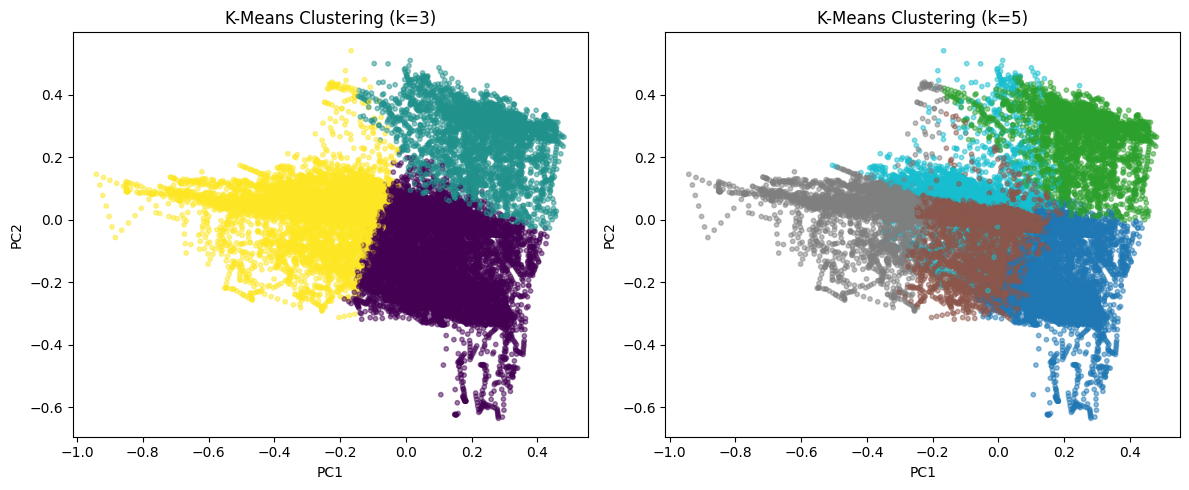

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionar variáveis relevantes (consumo + ambientais)
cols_cluster = ["Appliances", "lights", "T_out", "RH_out", "Windspeed", "Visibility"]
X = df2_scaled[cols_cluster]

# Aplicar K-Means com 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels3 = kmeans3.fit_predict(X)

# Aplicar K-Means com 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
labels5 = kmeans5.fit_predict(X)

# Adicionar ao DataFrame
df_clusters = df2_scaled.copy()
df_clusters["Cluster_3"] = labels3
df_clusters["Cluster_5"] = labels5

# Resumo estatístico por cluster
summary3 = df_clusters.groupby("Cluster_3")[cols_cluster].mean().round(3)
summary5 = df_clusters.groupby("Cluster_5")[cols_cluster].mean().round(3)

print("🔹 Médias por cluster (K=3):")
print(summary3, "\n")
print("🔹 Médias por cluster (K=5):")
print(summary5)

# Visualização PCA (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

# Gráfico para K=3
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels3, cmap="viridis", alpha=0.5, s=10)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Gráfico para K=5
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels5, cmap="tab10", alpha=0.5, s=10)
plt.title("K-Means Clustering (k=5)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


## Exercício 34 — Classificação binária (alto vs baixo consumo)  

**Enunciado**  
Transformar o problema de consumo de energia em uma tarefa de classificação binária, separando os registros em **alto consumo** e **baixo consumo**, com base na mediana da variável `Appliances`. Em seguida, treinar e avaliar dois modelos de classificação: **Regressão Logística** e **Random Forest Classifier**.  

---

**Objetivo**  
- Criar uma variável binária (`HighConsumption`) com base na mediana do consumo de `Appliances`.  
- Dividir os dados em treino e teste.  
- Treinar dois modelos de classificação: Regressão Logística e Random Forest.  
- Avaliar os modelos utilizando métricas como **acurácia, precisão, recall e F1-score**.  
- Visualizar a matriz de confusão para cada modelo.  
- Comparar o desempenho entre os dois classificadores.  

---



🔹 Logistic Regression
Acurácia:  0.733
Precisão:  0.770
Recall:    0.815
F1-Score:  0.792

Relatório de classificação:
              precision    recall  f1-score   support

       Baixo       0.66      0.60      0.63      2239
        Alto       0.77      0.82      0.79      3682

    accuracy                           0.73      5921
   macro avg       0.72      0.71      0.71      5921
weighted avg       0.73      0.73      0.73      5921



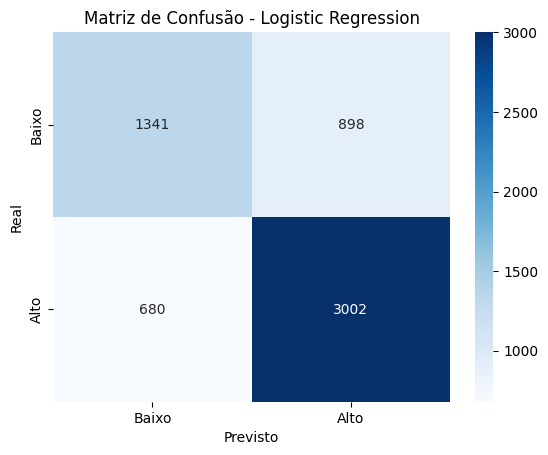


🔹 Random Forest Classifier
Acurácia:  0.819
Precisão:  0.851
Recall:    0.859
F1-Score:  0.855

Relatório de classificação:
              precision    recall  f1-score   support

       Baixo       0.76      0.75      0.76      2239
        Alto       0.85      0.86      0.85      3682

    accuracy                           0.82      5921
   macro avg       0.81      0.81      0.81      5921
weighted avg       0.82      0.82      0.82      5921



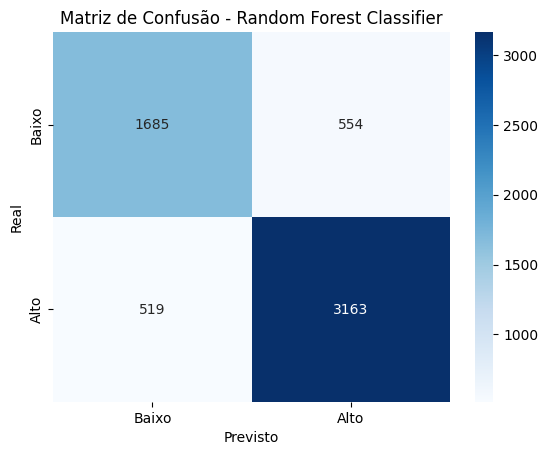

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Criar variável binária (1 = alto consumo, 0 = baixo consumo)
threshold = df2["Appliances"].median()
df2_scaled["HighConsumption"] = (df2["Appliances"] >= threshold).astype(int)

# Variáveis preditoras (removendo Appliances, date, HighConsumption)
X = df2_scaled.drop(columns=["Appliances","date","HighConsumption"])
y = df2_scaled["HighConsumption"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Modelo 1: Logistic Regression ---
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- Modelo 2: Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Avaliação ---
def avaliar_modelo(nome, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n🔹 {nome}")
    print(f"Acurácia:  {acc:.3f}")
    print(f"Precisão:  {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-Score:  {f1:.3f}")
    print("\nRelatório de classificação:")
    print(classification_report(y_true, y_pred, target_names=["Baixo","Alto"]))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo","Alto"], yticklabels=["Baixo","Alto"])
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Avaliar modelos
avaliar_modelo("Logistic Regression", y_test, y_pred_log)
avaliar_modelo("Random Forest Classifier", y_test, y_pred_rf)


## Exercício 35 — Avaliação de classificação  

**Enunciado**  
Avaliar o desempenho dos modelos de classificação binária (Regressão Logística e Random Forest Classifier) utilizando métricas de qualidade e matriz de confusão.  

---

**Objetivo**  
- Calcular as métricas de avaliação: **acurácia, precisão, recall e F1-score**.  
- Exibir os resultados de forma clara para cada modelo.  
- Gerar a **matriz de confusão** com visualização gráfica para identificar os acertos e erros dos classificadores.  
- Comparar o desempenho dos modelos a partir das métricas apresentadas.  

---



🔹 Logistic Regression
Acurácia:  0.733
Precisão:  0.770
Recall:    0.815
F1-Score:  0.792


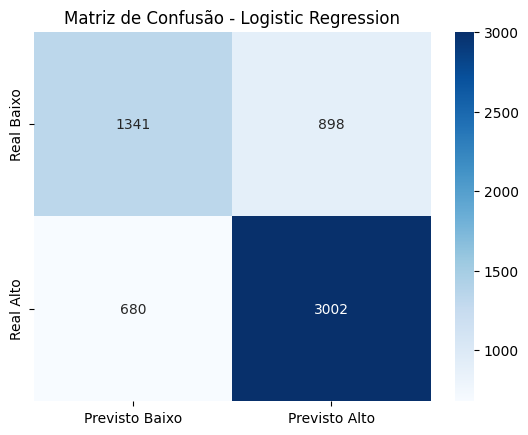


🔹 Random Forest Classifier
Acurácia:  0.819
Precisão:  0.851
Recall:    0.859
F1-Score:  0.855


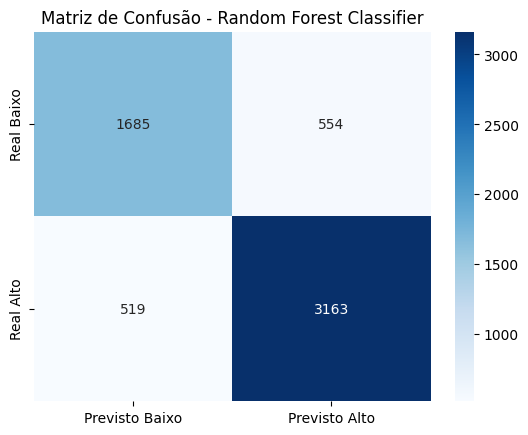

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(nome, y_true, y_pred):
    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n🔹 {nome}")
    print(f"Acurácia:  {acc:.3f}")
    print(f"Precisão:  {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-Score:  {f1:.3f}")

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Previsto Baixo","Previsto Alto"],
                yticklabels=["Real Baixo","Real Alto"])
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

    return cm

# Avaliar Logistic Regression
cm_log = avaliar_modelo("Logistic Regression", y_test, y_pred_log)

# Avaliar Random Forest Classifier
cm_rf = avaliar_modelo("Random Forest Classifier", y_test, y_pred_rf)


## Exercício 36 — Importação e visualização inicial  

**Enunciado**  
Importar o dataset *Individual Household Electric Power Consumption* e realizar a inspeção inicial dos dados para compreender sua estrutura.  

---

**Objetivo**  
- Carregar o arquivo de dados no ambiente de análise.  
- Visualizar as primeiras linhas da base.  
- Verificar a quantidade de registros e colunas disponíveis.  
- Identificar as variáveis principais para análise futura.  

---


DataSet disponível em: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption <br>
1. Entre no link
2. Clique em Download
3. Extraia o arquivo zipado
4. Copie o arquivo
5. Cole o arquivo no ficheiro

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption (1).txt


In [ ]:
import pandas as pd

df = pd.read_csv("household_power_consumption (1).txt", sep=";", na_values="?", low_memory=False)

print("Formato da base:", df.shape)
print("\nColunas disponíveis:")
print(df.columns)
df.head()

Formato da base: (2075259, 9)

Colunas disponíveis:
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


A base contém 2.075.259 registros e 9 variáveis. As variáveis principais são: Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2 e Sub_metering_3, além de Date e Time. O DataFrame foi carregado corretamente e as primeiras linhas confirmam a estrutura.

## Exercício 37 — Amostragem de dados (1%)  

**Enunciado**  
Realizar uma amostragem aleatória de 1% da base de dados original e verificar se a distribuição de `Global_active_power` na amostra mantém o mesmo padrão da base completa.  

---

**Objetivo**  
- Selecionar 1% dos registros da base de forma aleatória.  
- Comparar a distribuição de `Global_active_power` entre a base completa e a amostra.  
- Avaliar se a amostra é representativa do conjunto original.  

---


Tamanho da amostra: (20753, 9)


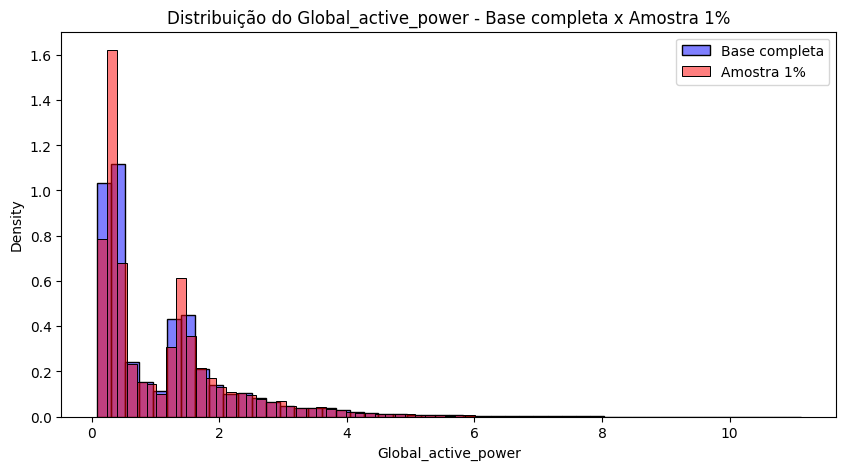

In [ ]:
df_sample = df.sample(frac=0.01, random_state=42)

print("Tamanho da amostra:", df_sample.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["Global_active_power"].dropna().astype(float), bins=50, color="blue", label="Base completa", stat="density", alpha=0.5)
sns.histplot(df_sample["Global_active_power"].dropna().astype(float), bins=50, color="red", label="Amostra 1%", stat="density", alpha=0.5)
plt.legend()
plt.title("Distribuição do Global_active_power - Base completa x Amostra 1%")
plt.show()

Foi criada uma amostra de 1% dos registros (20.753 linhas) usando df.sample(frac=0.01). A distribuição de Global_active_power na amostra manteve o mesmo padrão da base completa, confirmando que uma pequena amostragem aleatória é representativa do conjunto total.

## Exercício 38 — Distribuição do consumo  

**Enunciado**  
Analisar a distribuição da variável `Global_active_power`, verificando o comportamento geral do consumo de energia e identificando possíveis assimetrias ou outliers.  

---

**Objetivo**  
- Plotar a distribuição de `Global_active_power` com histograma e curva de densidade.  
- Identificar a concentração de valores e possíveis outliers.  
- Interpretar se a distribuição é simétrica ou assimétrica.  

---


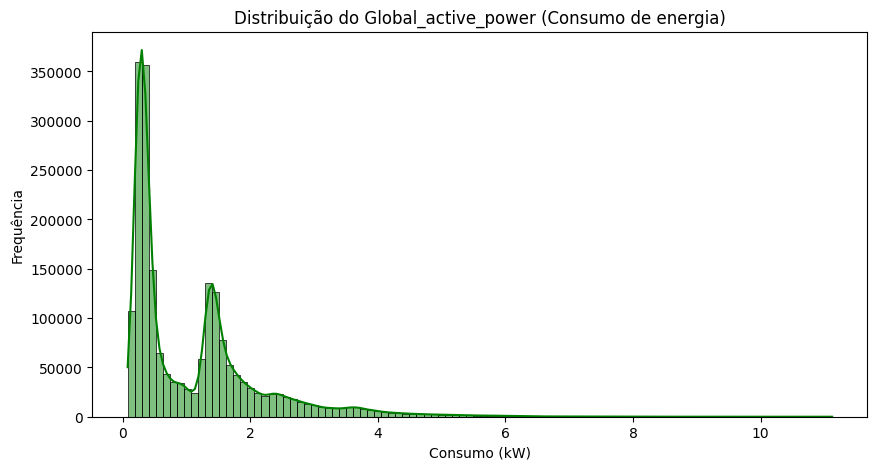

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["Global_active_power"].dropna().astype(float), bins=100, kde=True, color="green")
plt.title("Distribuição do Global_active_power (Consumo de energia)")
plt.xlabel("Consumo (kW)")
plt.ylabel("Frequência")
plt.show()

O consumo (Global_active_power) apresenta uma distribuição assimétrica à direita. A maior parte dos registros concentra-se em valores baixos (0 a 2 kW), enquanto poucos registros indicam consumos muito altos, configurando outliers.

## Exercício 39 — Relação entre variáveis elétricas  

**Enunciado**  
Investigar a relação entre `Voltage` (tensão) e `Global_intensity` (corrente elétrica), analisando se há padrões ou correlações entre as variáveis.  

---

**Objetivo**  
- Plotar gráfico de dispersão entre `Voltage` e `Global_intensity`.  
- Identificar se há correlação direta ou inversa entre as variáveis.  
- Interpretar o comportamento físico esperado (queda de tensão com aumento de corrente).  

---


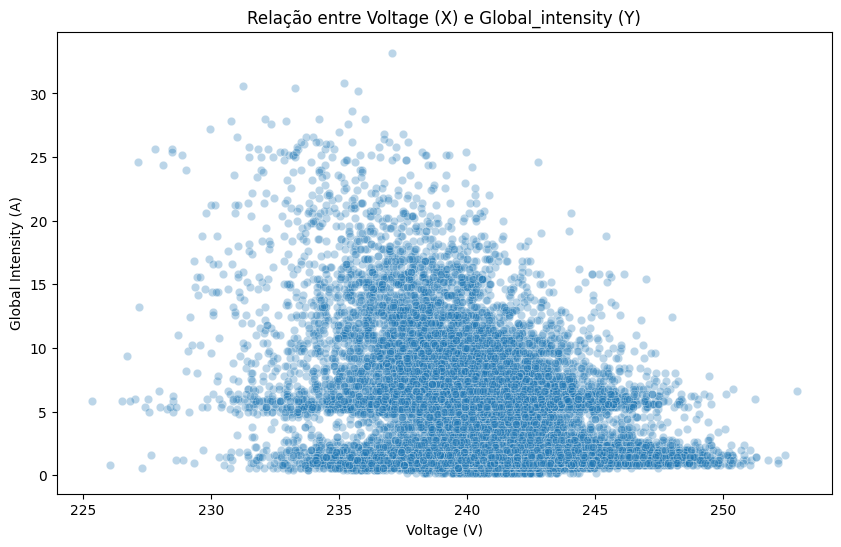

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Voltage", y="Global_intensity", data=df_sample, alpha=0.3)
plt.title("Relação entre Voltage (X) e Global_intensity (Y)")
plt.xlabel("Voltage (V)")
plt.ylabel("Global Intensity (A)")
plt.show()

O gráfico de dispersão entre Voltage (X) e Global_intensity (Y) mostra uma correlação inversa: conforme a intensidade aumenta, a tensão tende a diminuir. Isso confirma a relação esperada fisicamente entre carga e queda de tensão.

## Exercício 40 — Clustering com K-Means

**Enunciado**  
Aplicar o algoritmo **K-Means** para segmentar os registros de consumo dos três medidores (`Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3`) em **3 grupos distintos**, interpretando os centróides de cada cluster e visualizando os resultados em gráficos de dispersão.

---

**Objetivo**  
- Selecionar apenas os atributos dos três medidores de energia.  
- Padronizar os dados antes de aplicar o K-Means.  
- Aplicar o algoritmo **K-Means com 3 clusters**.  
- Calcular e interpretar os **centróides** de cada cluster.  
- Visualizar os clusters em pares de variáveis (`Sub_metering_1` vs `Sub_metering_2`, etc.).  

---


Centróides (valores médios por cluster):


,Sub_metering_1,Sub_metering_2,Sub_metering_3
Cluster 0,0.07,0.88,0.42
Cluster 1,0.23,2.05,17.87
Cluster 2,36.89,2.61,11.27


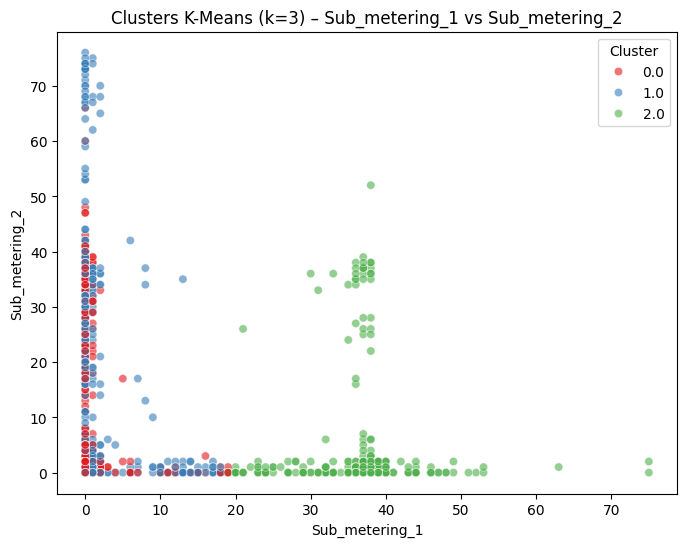

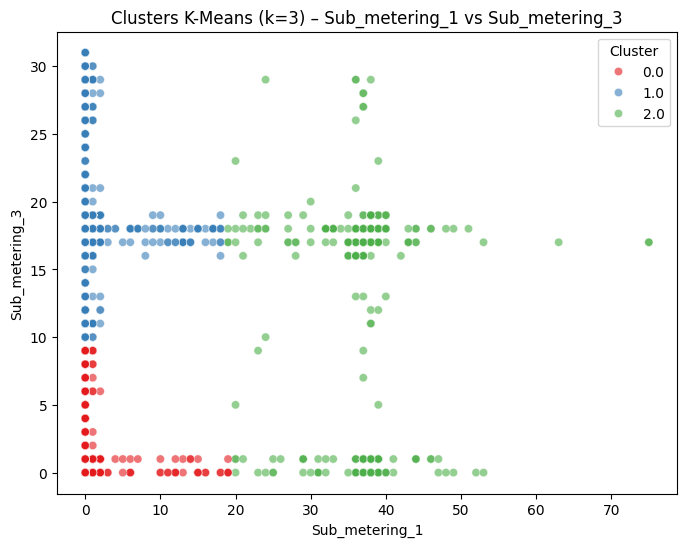

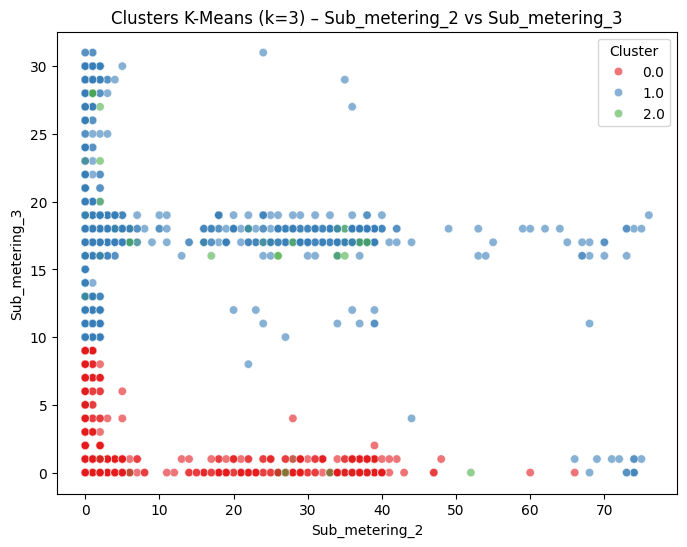

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selecionar apenas os atributos de interesse (usando a amostra pra ser mais leve)
X = df_sample[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].astype(float).dropna()

# Padronizar os dados (importante pro KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters no DataFrame
df_sample.loc[X.index, "Cluster"] = clusters

# Mostrar os centróides (em escala original)
centroids_scaled = kmeans.cluster_centers_
centroids = pd.DataFrame(
    scaler.inverse_transform(centroids_scaled),
    columns=["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
)
centroids.index = [f"Cluster {i}" for i in range(3)]
print("Centróides (valores médios por cluster):")
display(centroids.round(2))

# Visualizações em pares de variáveis
pairs = [("Sub_metering_1","Sub_metering_2"),
         ("Sub_metering_1","Sub_metering_3"),
         ("Sub_metering_2","Sub_metering_3")]

for x,y in pairs:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df_sample.loc[X.index],
        x=x, y=y, hue="Cluster", palette="Set1", alpha=0.6
    )
    plt.title(f"Clusters K-Means (k=3) – {x} vs {y}")
    plt.legend(title="Cluster")
    plt.show()

O K-Means com 3 clusters aplicado em Sub_metering_1, Sub_metering_2 e Sub_metering_3 identificou padrões distintos de consumo doméstico.

Cluster 0: baixo consumo específico nos três sub-medidores.

Cluster 1: consumo concentrado em Sub_metering_3 (aquecimento/boiler).

Cluster 2: consumo elevado em Sub_metering_1 (cozinha) e também em Sub_metering_3.
Os scatter plots confirmam a separação dos grupos, mostrando que cada cluster representa um padrão de consumo distinto.

A análise mostrou que o consumo elétrico residencial tende a se concentrar em valores baixos, mas existem perfis específicos que revelam diferentes hábitos energéticos (uso de cozinha, aquecimento e aparelhos de maior demanda). A aplicação de amostragem, análise de distribuição, correlação e clustering permitiu identificar tanto o comportamento geral da população quanto grupos com padrões distintos de consumo.

## Resumo da Análise de Consumo de Energia Residencial

Este projeto teve como tema principal a análise de dados de consumo individual de energia elétrica residencial. O objetivo geral foi explorar padrões de consumo, investigar a relação entre variáveis elétricas e ambientais, aplicar técnicas de machine learning para segmentação e previsão, e avaliar o desempenho de diferentes modelos.

As discussões mais empolgantes e insights notáveis incluem:

*   **Padrões de consumo ao longo do tempo:** A análise da série temporal revelou picos de consumo em horários específicos do dia (manhã e noite) e diferenças claras entre dias úteis e finais de semana, mostrando a influência dos hábitos diários no uso de energia.
*   **Correlações entre variáveis:** Foi interessante observar a forte correlação positiva entre `Global_active_power` e `Global_intensity`, bem como a correlação inversa entre `Voltage` e `Global_intensity`, confirmando princípios básicos da eletricidade aplicados a dados reais.
*   **Segmentação de consumo com K-Means:** A aplicação do K-Means nos dados dos sub-medidores permitiu identificar clusters de consumo com perfis distintos, sugerindo diferentes usos de energia dentro da residência (cozinha, lavanderia, aquecimento). A visualização desses clusters no espaço das componentes principais (PCA) reforçou essa distinção.
*   **Previsão de consumo com Machine Learning:** A comparação entre Regressão Linear Múltipla e Random Forest Regressor para prever o consumo de eletrodomésticos (`Appliances`) mostrou que modelos mais complexos como Random Forest podem capturar melhor as não linearidades e interações entre variáveis, resultando em um desempenho significativamente superior (maior R² e menor RMSE).
*   **Classificação de alto vs baixo consumo:** A transformação do problema em classificação binária permitiu avaliar a capacidade dos modelos de prever se um determinado período terá alto ou baixo consumo. O Random Forest Classifier também demonstrou melhor performance nesta tarefa em comparação com a Regressão Logística, com maior acurácia e F1-score.

Em suma, a análise combinou exploração de dados, visualização e técnicas de machine learning para extrair insights valiosos sobre o consumo de energia residencial, desde padrões diários e sazonais até a identificação de grupos de consumo e a construção de modelos preditivos e classificadores.